In [1]:
import numpy as np
from numpy import pi, sqrt, exp, arcsin, arctan, arccos
import numpy.ma as ma
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt

# mpl.use('pgf')
if mpl.get_backend() == 'pgf':
    pass
else:
    %matplotlib inline 
    %config InlineBackend.figure_format = 'retina'
    
FIGURE_PATH='figures/'
DATA_PATH='data/Aktivierung/'

from scipy.constants import h, m_e, k, N_A, pi, e, hbar, u, k, mu_0

from scipy.optimize import curve_fit
import scipy.integrate as integrate
from scipy.stats import chi2
from scipy.special import gamma

In [2]:
def sf(x):
    # calculate significant figures
    # return: decimal place to be rounded to
    if isinstance(x, float) or isinstance(x,int):
        if x == 0:
            return 20 
        else:
            return int(-1 * np.floor(np.log10(x)) + 1)
    else:
        return (-1 * np.floor(np.log10(np.min(ma.masked_where(x==0,x)))) + 1).astype(int)

In [3]:
def cm2inch(lst):
    inch = 2.54
    if isinstance(lst, list):
        return [x/inch for x in lst] 
    elif isinstance(lst, float):
        return lst/inch

default_width =  cm2inch(21/sqrt(2)) # 5.78853 # approx 14.7cm
default_ratio = (sqrt(5.0) - 1.0) / 2.0 # golden mean
print(default_width)

5.846158427132873


In [4]:
default_width = cm2inch(21/sqrt(2))
default_ratio = default_ratio = (sqrt(5.0) - 1.0) / 2.0 # golden mean

In [5]:
from matplotlib import rcParams
from matplotlib import cycler
if mpl.get_backend() == 'pgf':
    rcParams.update({'legend.loc' : 'best'})
    rcParams.update({
        "text.usetex": True,
        "pgf.texsystem": "xelatex",
        "pgf.rcfonts": False,
        "font.family": "serif",
        "font.serif": [],
        "font.sans-serif": [],
        "font.monospace": [],
        "figure.figsize": [default_width, default_width * default_ratio],
        "font.size" : 16,
        "pgf.preamble": [
            r"\usepackage[utf8x]{inputenc}",
            r"\usepackage[T1]{fontenc}",
        ],
        "figure.constrained_layout.use": True,
    })
    rcParams.update({'savefig.bbox' : 'standard'})
    rcParams.update({'savefig.pad_inches' : 0.0})
else:
    rcParams.update({'figure.autolayout': True})
    rcParams.update({'figure.figsize' : [15,9.47]})
    rcParams.update({'font.size' : 16})
rcParams.update({'errorbar.capsize' : 4})
rcParams.update({'legend.loc' : 'best'})
rcParams.update({'axes.prop_cycle': cycler('color', ["#cf115d", "#786eb3", "#bce333", "#99c1b8", "#0cc0aa", "#8547d9", "#76f014", "#ea85f5"])})

###### Fit function to data
```
def fit_function(x, param1, param2, param3):
    return param1*x**param3 + param2 

popt, pcov = curve_fit(fit_function, x, y, sigma = error_array)

param1 = popt[0]
param1_err = pcov[0][0]
```

###### Plot data

```
# initiate figure
if mpl.get_backend() == 'pgf':
    plt.clf()
    plt.figure(figsize=(default_width, default_width*default_ratio))

# plots
plt.errorbar(x, y, linestyle='none', marker='.', yerr=error_array)
plt.plot(x,fit_function(x, *popt))

# options
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.title('title')
# plt.xticks(x)
# plt.yscale('log') # set y scale to logarithmic
plt.legend()

# save and show
filename='filename'
if mpl.get_backend() == 'pgf':
    plt.savefig(FIGURE_PATH+filename+'.pgf', format='pgf')
    plt.savefig(FIGURE_PATH+filename+'.pdf', format='pdf')
    plt.clf()
plt.savefig(FIGURE_PATH+filename+'.jpg', format='jpg')
plt.show()
```

###### Load .txt data into arrays
```
data1, data2 = np.loadtxt('data/dataset.txt', skiprows=1, usecols=(0,1), unpack=True)
```

###### Significant Figures
```
print(f"val: {round(val,sf(val_err))} +/- {round(val_err,sf(val_err))}")
```

# Teil 1: Bestimmung der Zeitkonstante eines RC-Glieds

### (i) $ C = 470$ nF, $R = 1$ k$\Omega$

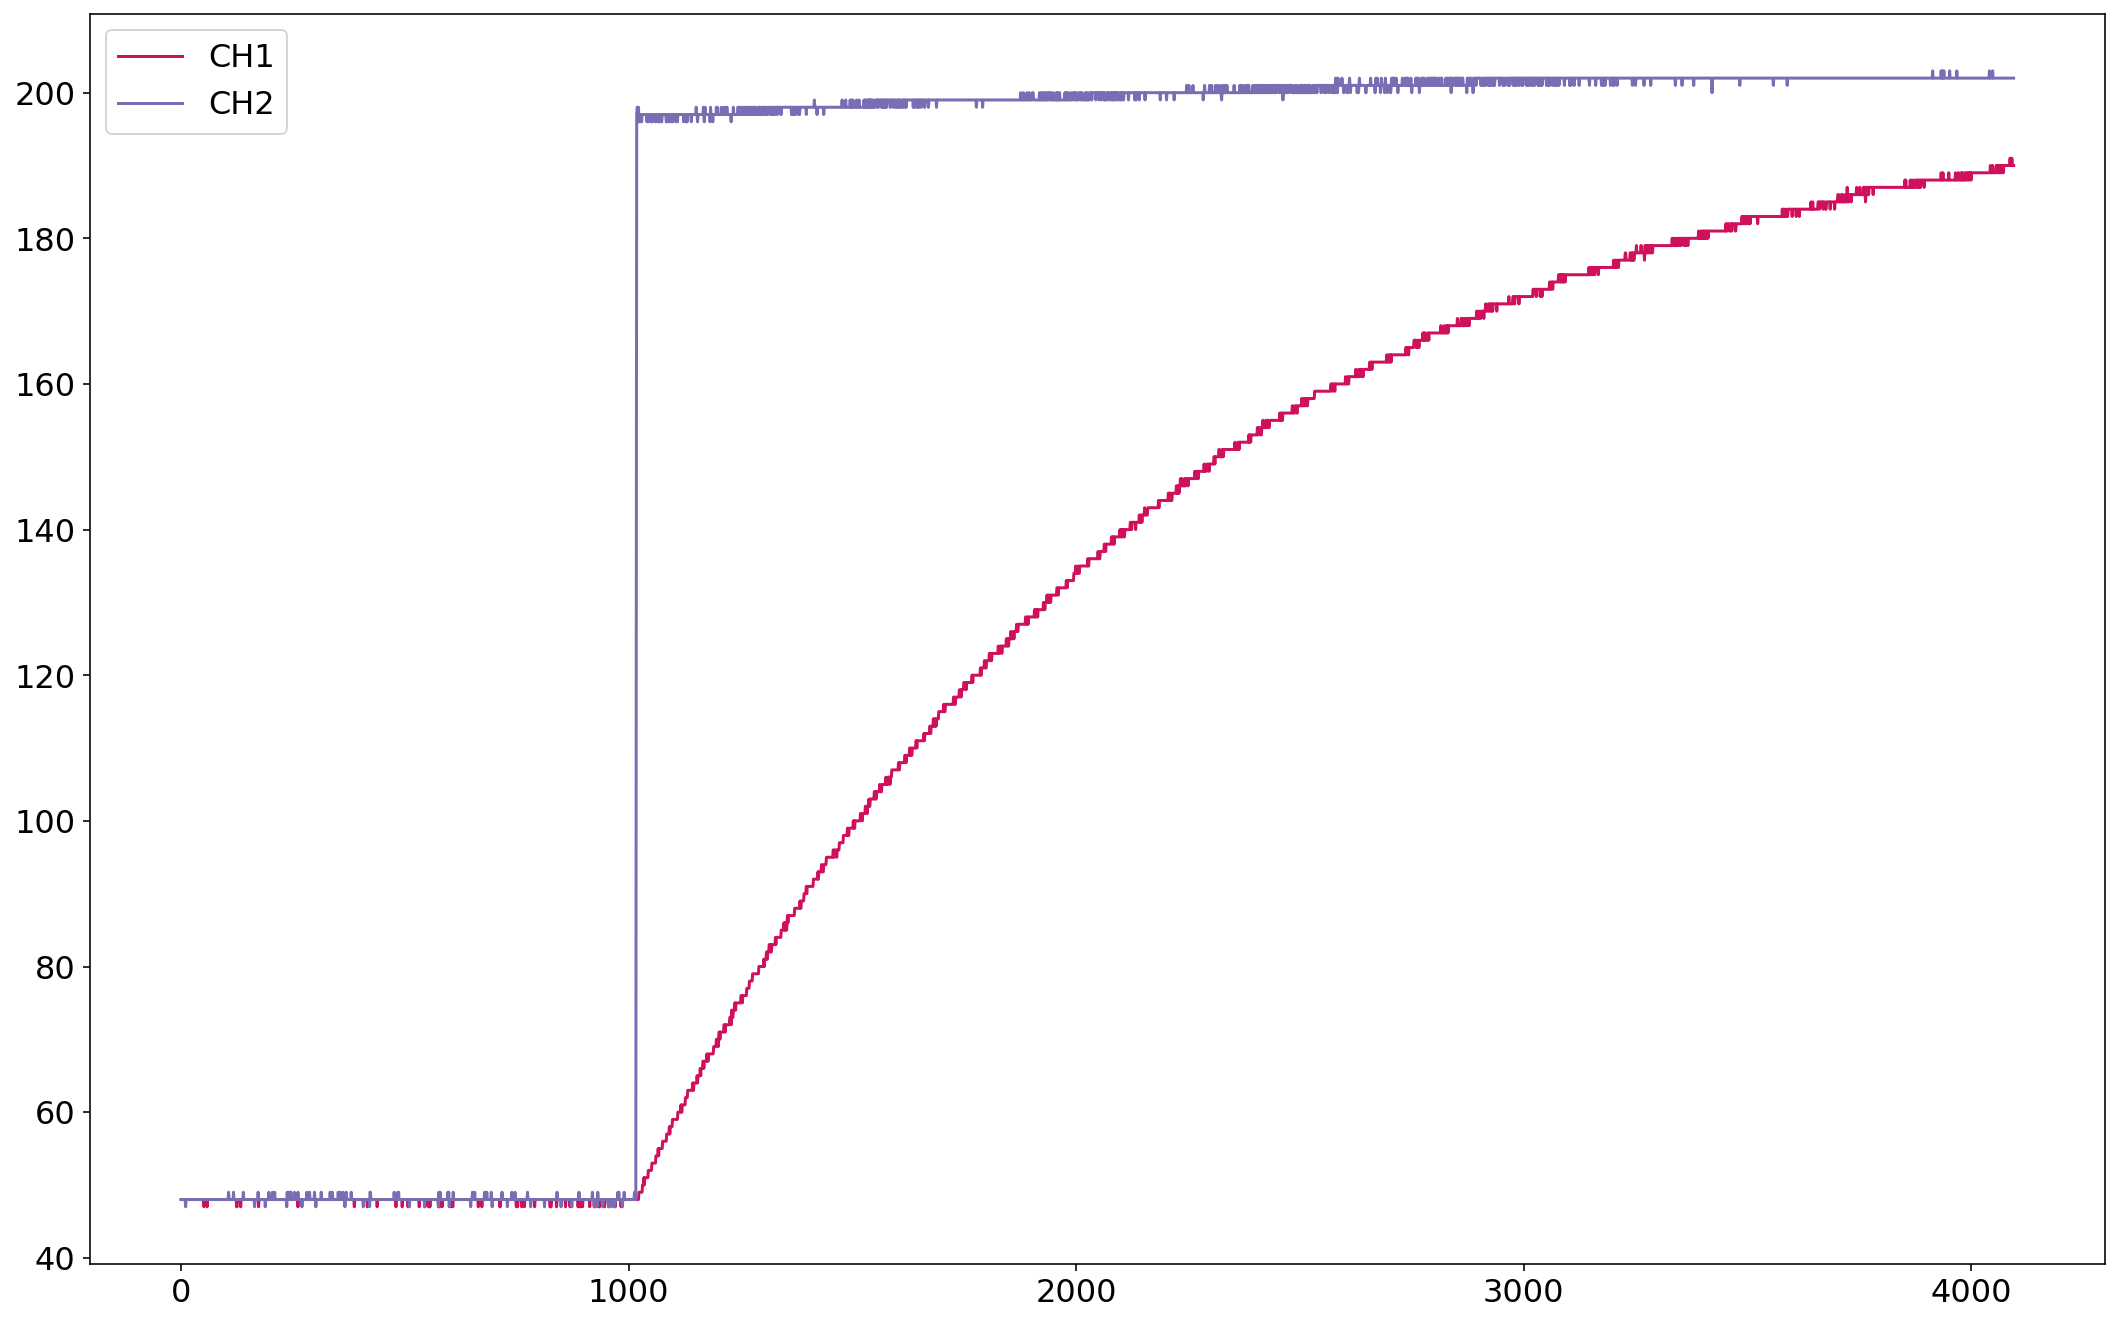

In [6]:
# Einlesen von Daten, CH1 => out, CH2 => in
N, CH1, CH2 = np.loadtxt('data/Messung1_RC1.txt', skiprows=10, unpack=True)
plt.plot(N, CH1, label='CH1')
plt.plot(N, CH2, label='CH2')
plt.legend()
plt.show()

In [7]:
# Skalierung der Werte auf Sekunden und Volt
r_N = 50e-6 / 125 # s / b.E ; ratio_N
r_ch1 = 1 / 32    # V / b.E ; ratio ch1
r_ch2 = 1 / 32    # V / b.E ; ratio ch2

t0     = r_N   * N   # s;
U_out0 = r_ch1 * CH1 # V;
U_in0  = r_ch2 * CH2 # V;

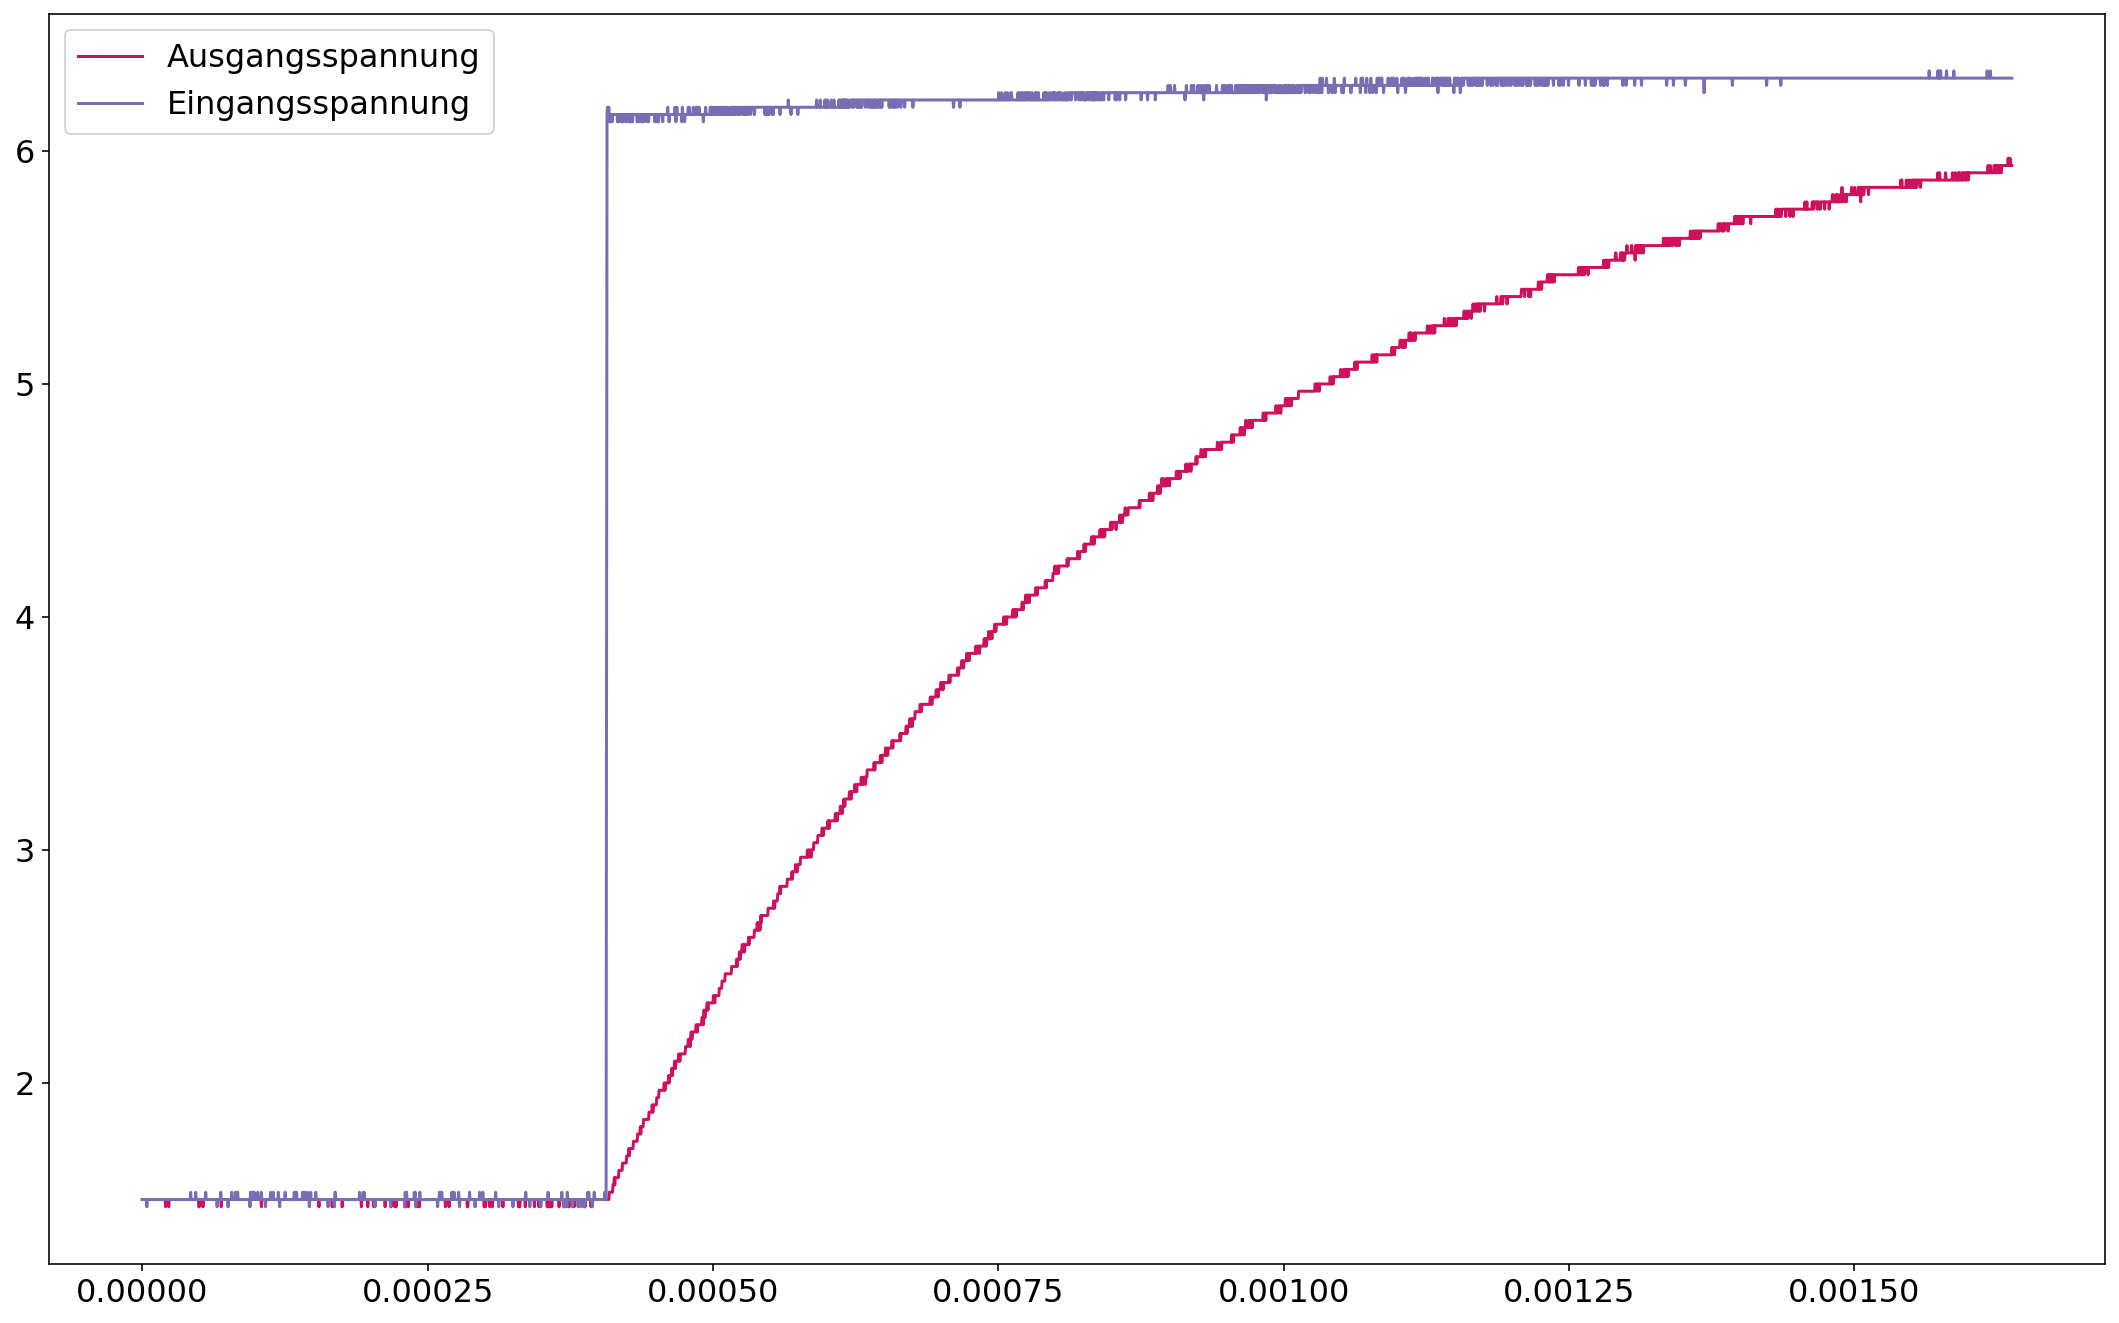

In [8]:
# Plotten der Reskalierten Größe 
if mpl.get_backend() == 'pgf':
    plt.clf()
    plt.figure(figsize=(default_width, default_width*default_ratio))
    
plt.plot(t0, U_out0, label='Ausgangsspannung')
plt.plot(t0, U_in0,  label='Eingangsspannung')
plt.legend()

# save and show
filename='messdaten_RC1'
if mpl.get_backend() == 'pgf':
    plt.savefig(FIGURE_PATH+filename+'.pgf', format='pgf')
    plt.savefig(FIGURE_PATH+filename+'.pdf', format='pdf')
    plt.clf()
plt.show()

In [9]:
# Inspeziere kleine Werte
print(U_out0[:1500:100])
print(U_in0[:1500:100])

[1.5     1.5     1.5     1.5     1.5     1.5     1.5     1.5     1.5
 1.5     1.5     1.84375 2.15625 2.5     2.84375]
[1.5     1.5     1.5     1.5     1.5     1.5     1.5     1.5     1.5
 1.5     1.5     6.15625 6.15625 6.1875  6.1875 ]


In [10]:
# Entferne alle Werte mit U <= 1.5 V
index = (U_out0 > 1.5)

U_out1 = U_out0[index]
U_in1  = U_in0[index]
t1     = t0[index]

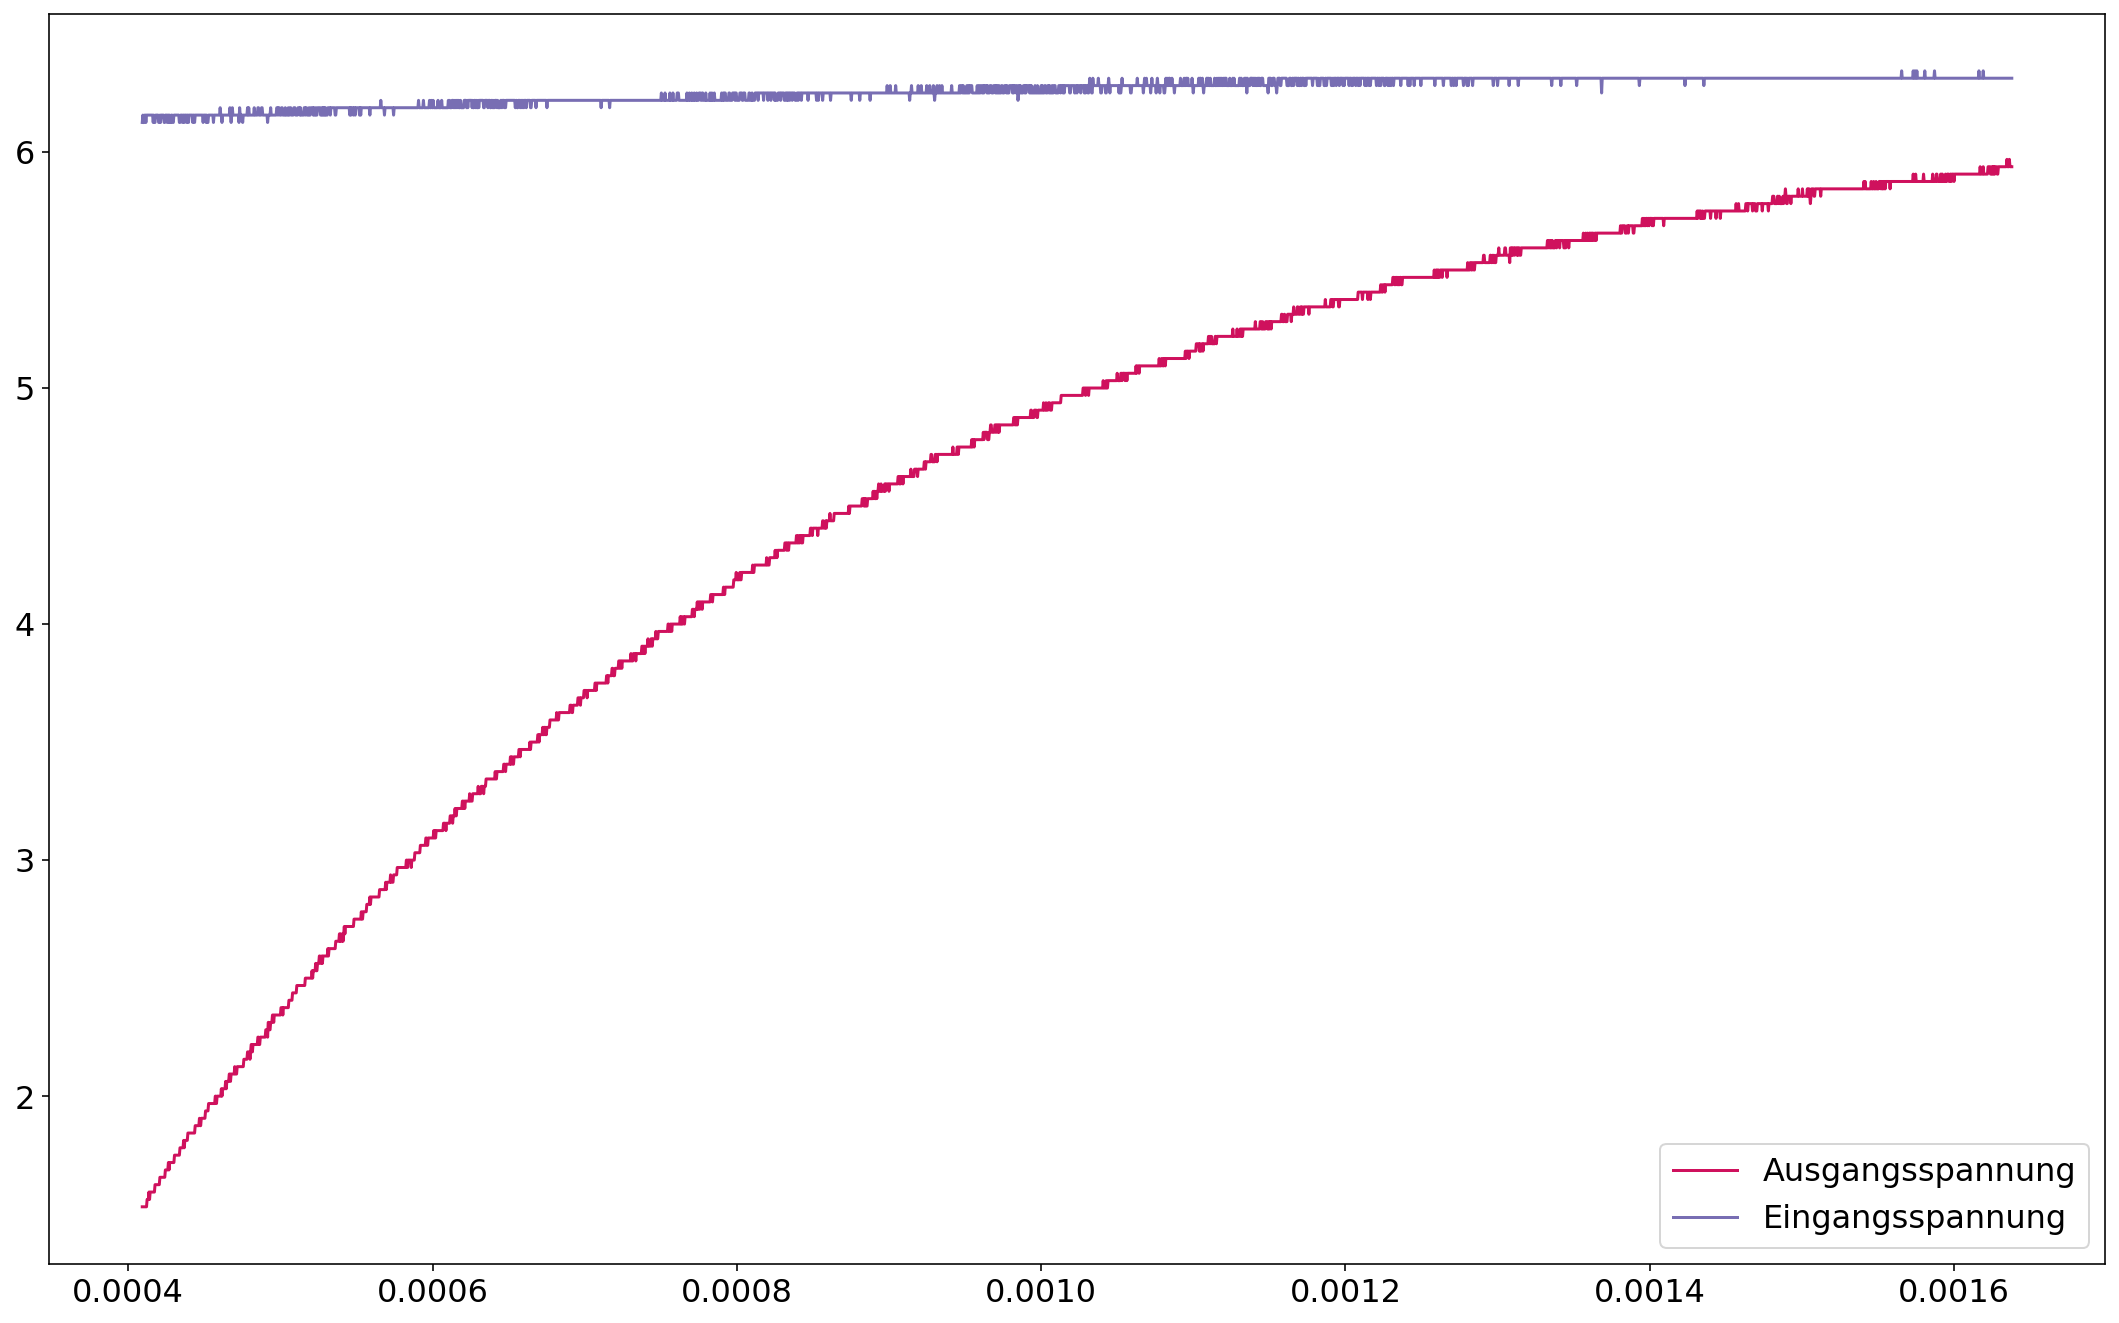

In [11]:
# Plotte Ausschnitt der Spannung über Kondensator
plt.plot(t1, U_out1, label='Ausgangsspannung')
plt.plot(t1, U_in1,  label='Eingangsspannung')
plt.legend()
plt.show()

### Fit Funktion
$$f(t) = U_E (1 - e^{-t/\tau}) + c $$

In [12]:
def fit_function_1(t, U_E, tau, offset):
    return U_E * (1 - np.exp(-t/tau)) + offset 

popt_1, pcov_1 = curve_fit(fit_function_1, t1, U_out1, p0=[10, 0.0005, -5])

print(popt_1)

[ 1.11551339e+01  4.81407902e-04 -4.85205351e+00]


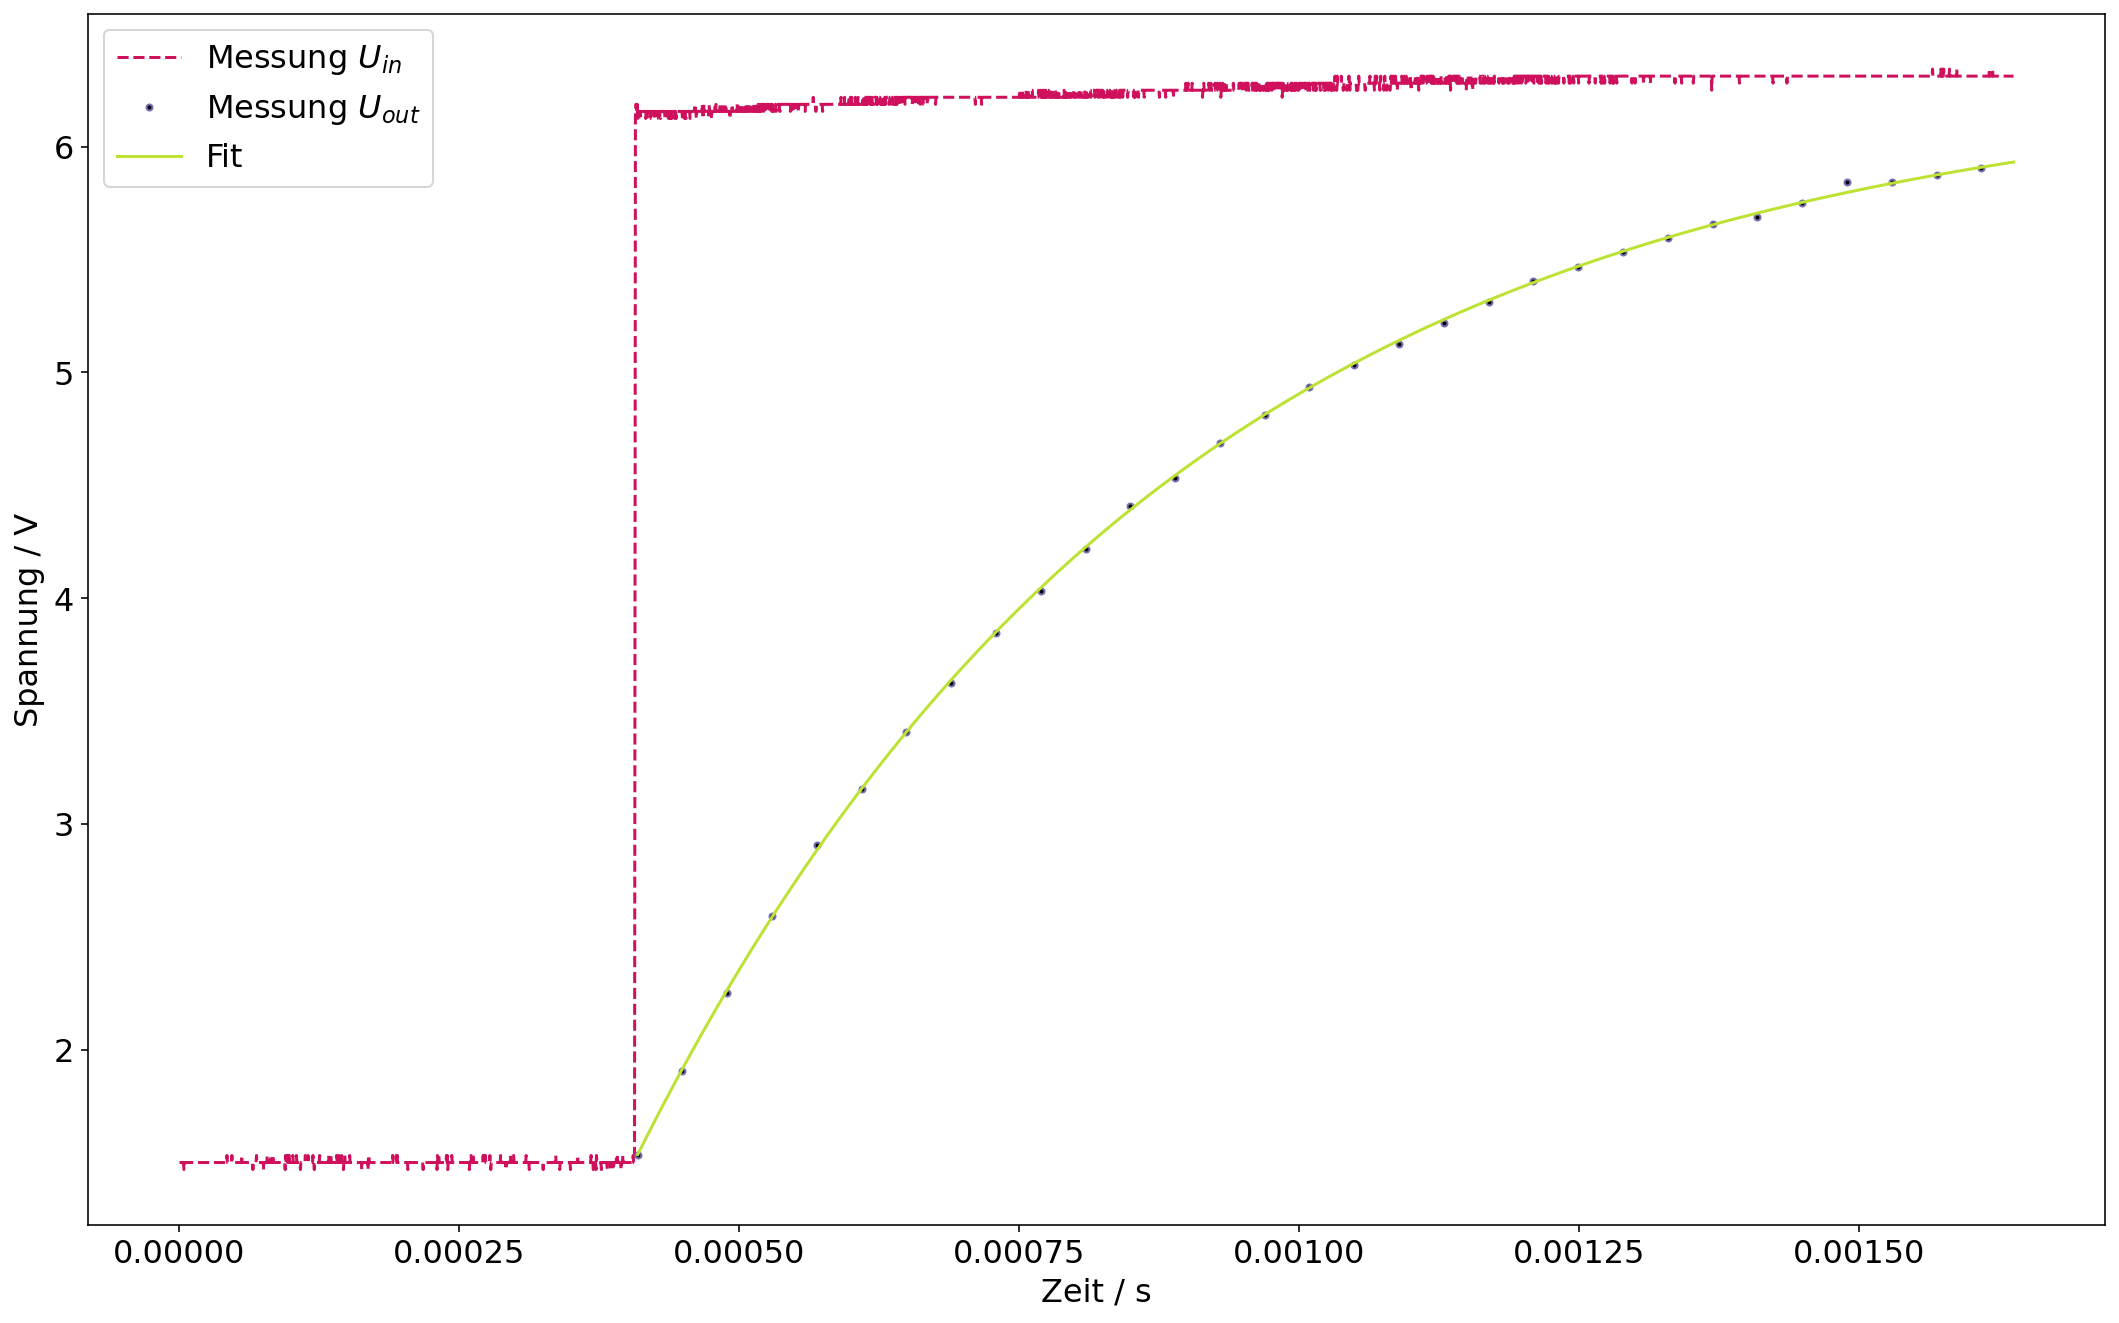

In [13]:
if mpl.get_backend() == 'pgf':
    plt.clf()
    plt.figure(figsize=(default_width, default_width*default_ratio))

plt.plot(t0, U_in0, linestyle='--', label=r'Messung $U_{in}$' )
plt.plot(t1[::100], U_out1[::100], linestyle='None', marker='.', markerfacecolor='black', label=r'Messung $U_{out}$')
plt.plot(t1, fit_function_1(t1, *popt_1), label='Fit')
plt.xlabel('Zeit / s')
plt.ylabel('Spannung / V')
plt.legend()
# plt.title("Spannung am Kondensator eine RC - Glieds während des Ladevorgangs")
    
# save and show
filename='fitfunktion_RC1'
if mpl.get_backend() == 'pgf':
    plt.savefig(FIGURE_PATH+filename+'.pgf', format='pgf')
    plt.savefig(FIGURE_PATH+filename+'.pdf', format='pdf')
    plt.clf()
plt.show()

### Vergleich von $\tau_{exp}$ und $\tau_{theo}$ 

In [14]:
C = 470e-9 # F; Kapazität
R = 1e3 # Ohm; ohm. Widerstand
tau_theo = R*C
tau_theo_err = tau_theo * np.sqrt(0.05**2 + 0.1**2)
print(f'Zeitkonstante theoretisch: tau_theoretisch = {tau_theo:e} +/- {tau_theo_err}s')
print(f'Zeitkonstante aus Messung: tau_messung = {popt_1[1]:e} +/- {pcov_1[1][1]:e}s')

Zeitkonstante theoretisch: tau_theoretisch = 4.700000e-04 +/- 5.254759747124506e-05s
Zeitkonstante aus Messung: tau_messung = 4.814079e-04 +/- 1.070790e-13s


### (ii) $ C = 4.7$ nF, $R = 10$ k$\Omega$

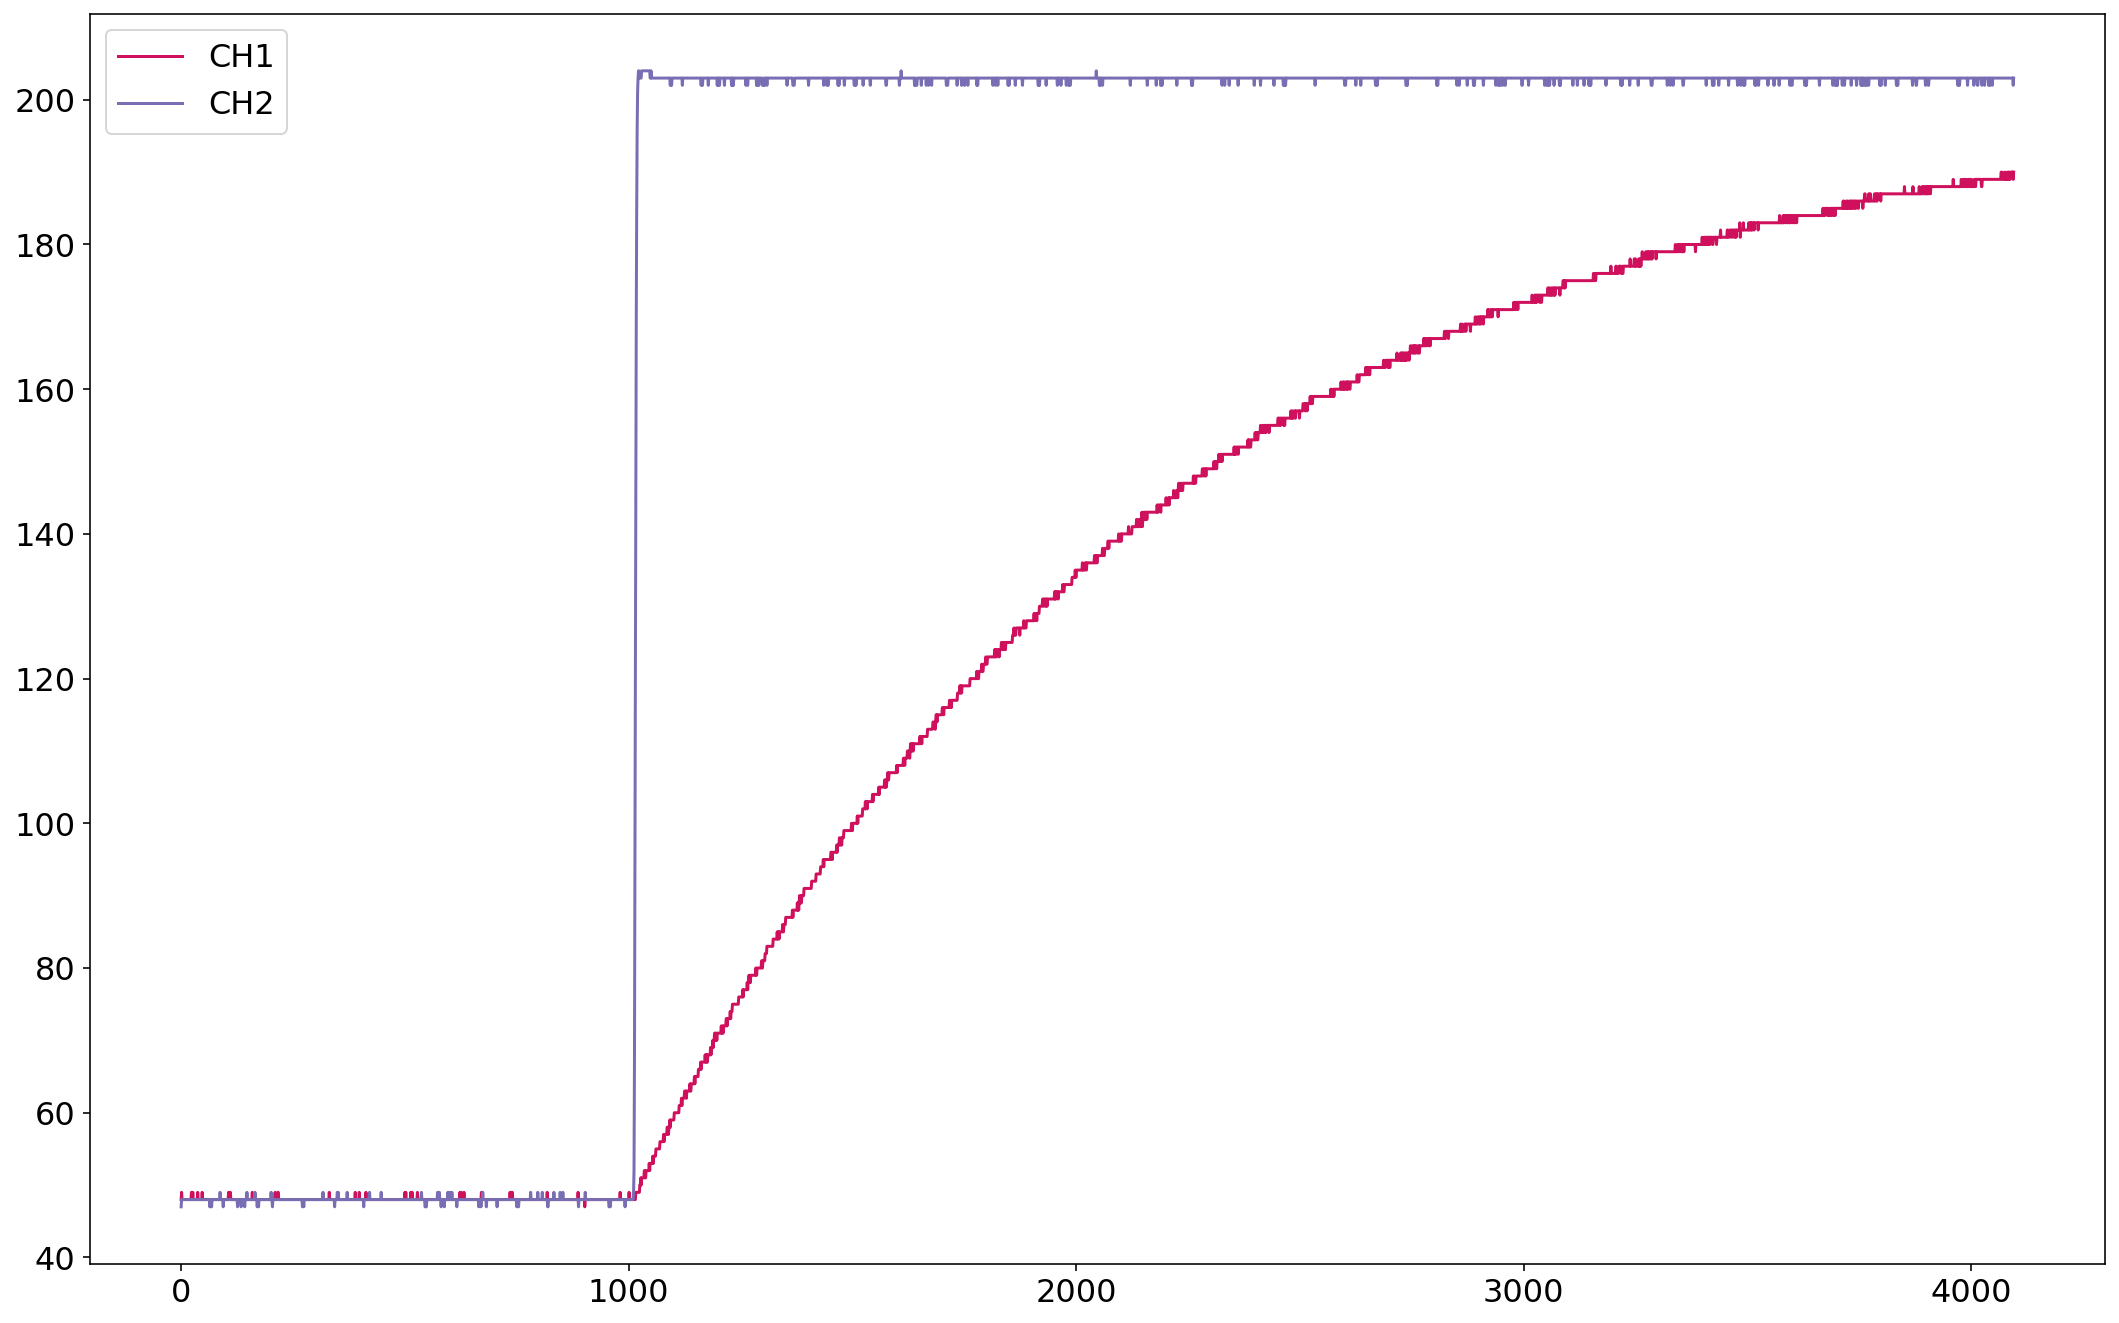

In [15]:
# Einlesen von Daten, CH1 => out, CH2 => in
N, CH1, CH2 = np.loadtxt('data/Messung1_RC2.txt', skiprows=10, unpack=True)
plt.plot(N, CH1, label='CH1')
plt.plot(N, CH2, label='CH2')
plt.legend()
plt.show()

In [16]:
# Skalierung der Werte auf Sekunden und Volt
r_N = 5e-6 / 125 # s / b.E ; ratio_N
r_ch1 = 1 / 32    # V / b.E ; ratio ch1
r_ch2 = 1 / 32    # V / b.E ; ratio ch2

t0     = r_N   * N   # s;
U_out0 = r_ch1 * CH1 # V;
U_in0  = r_ch2 * CH2 # V;

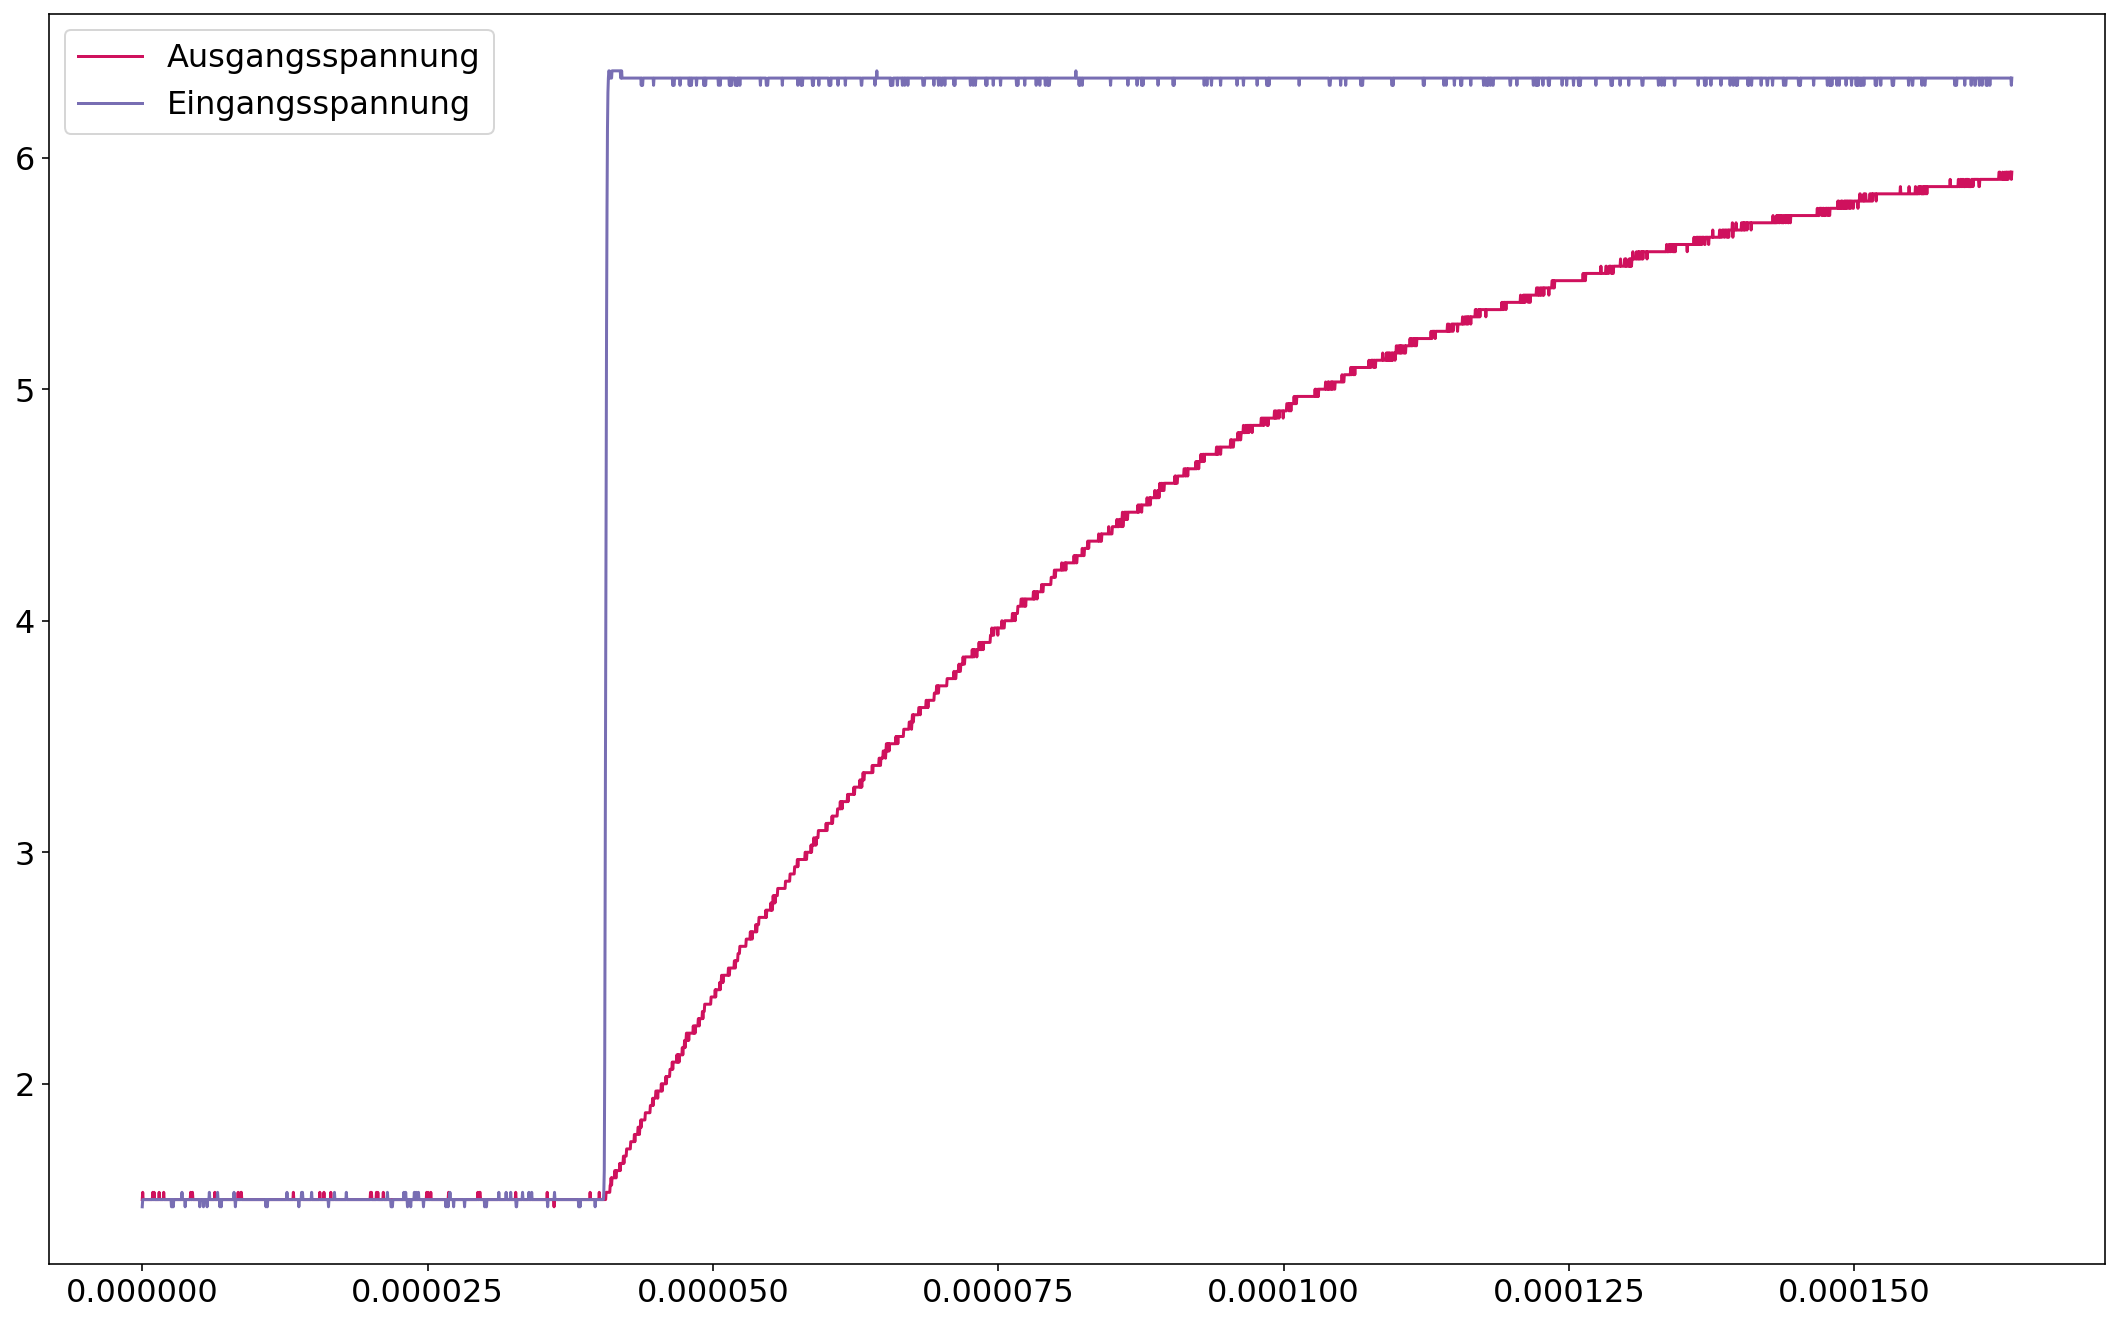

In [17]:
# Plotten der Reskalierten Größe 
plt.plot(t0, U_out0, label='Ausgangsspannung')
plt.plot(t0, U_in0,  label='Eingangsspannung')
plt.legend()
plt.show()

In [18]:
# Inspeziere kleine Werte
print(U_out0[:1500:100])
print(U_in0[:1500:100])

[1.5     1.5     1.5     1.5     1.5     1.53125 1.5     1.5     1.5
 1.5     1.5     1.84375 2.21875 2.53125 2.84375]
[1.46875 1.5     1.5     1.5     1.5     1.5     1.53125 1.5     1.5
 1.5     1.5     6.34375 6.3125  6.3125  6.34375]


In [19]:
# Entferne alle Werte mit U <= 1.5 V
index = (U_out0 > 1.6)

U_out1 = U_out0[index]
U_in1  = U_in0[index]
t1     = t0[index]

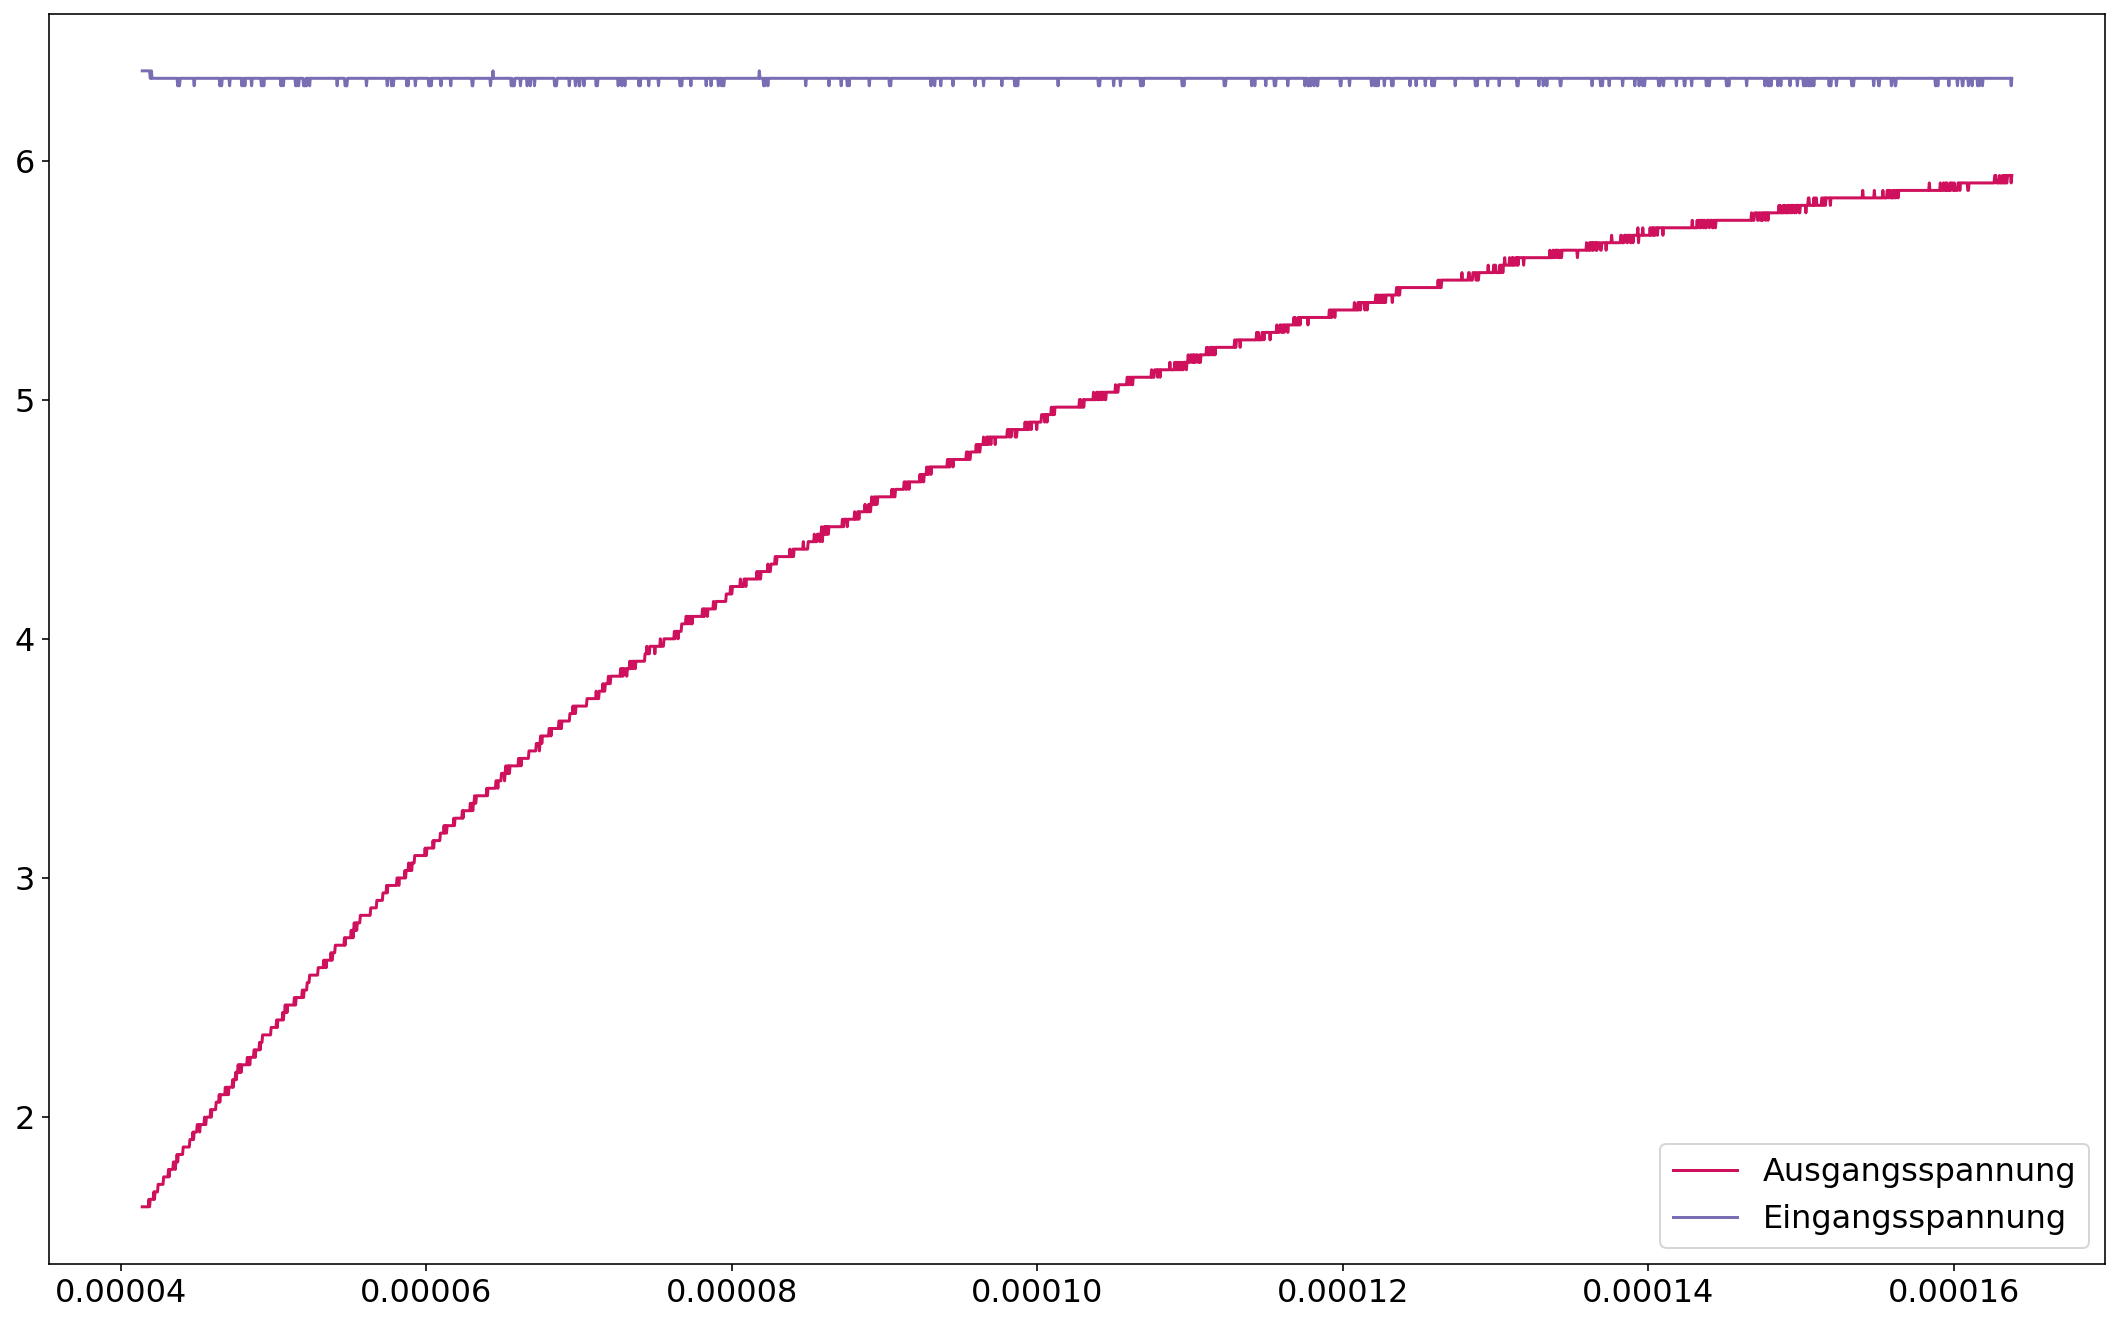

In [20]:
# Plotte Ausschnitt der Spannung über Kondensator
plt.plot(t1, U_out1, label='Ausgangsspannung')
plt.plot(t1, U_in1,  label='Eingangsspannung')
plt.legend()
plt.show()

### Fit Funktion
$$f(t) = U_E (1 - e^{-t/\tau}) + c $$

In [21]:
def fit_function_1(t, U_E, tau, offset):
    return U_E * (1 - np.exp(-t/tau)) + offset 

popt_1, pcov_1 = curve_fit(fit_function_1, t1, U_out1, p0=[10, 0.00005, -5])

print(popt_1)

[ 1.10992032e+01  4.79697795e-05 -4.81019128e+00]


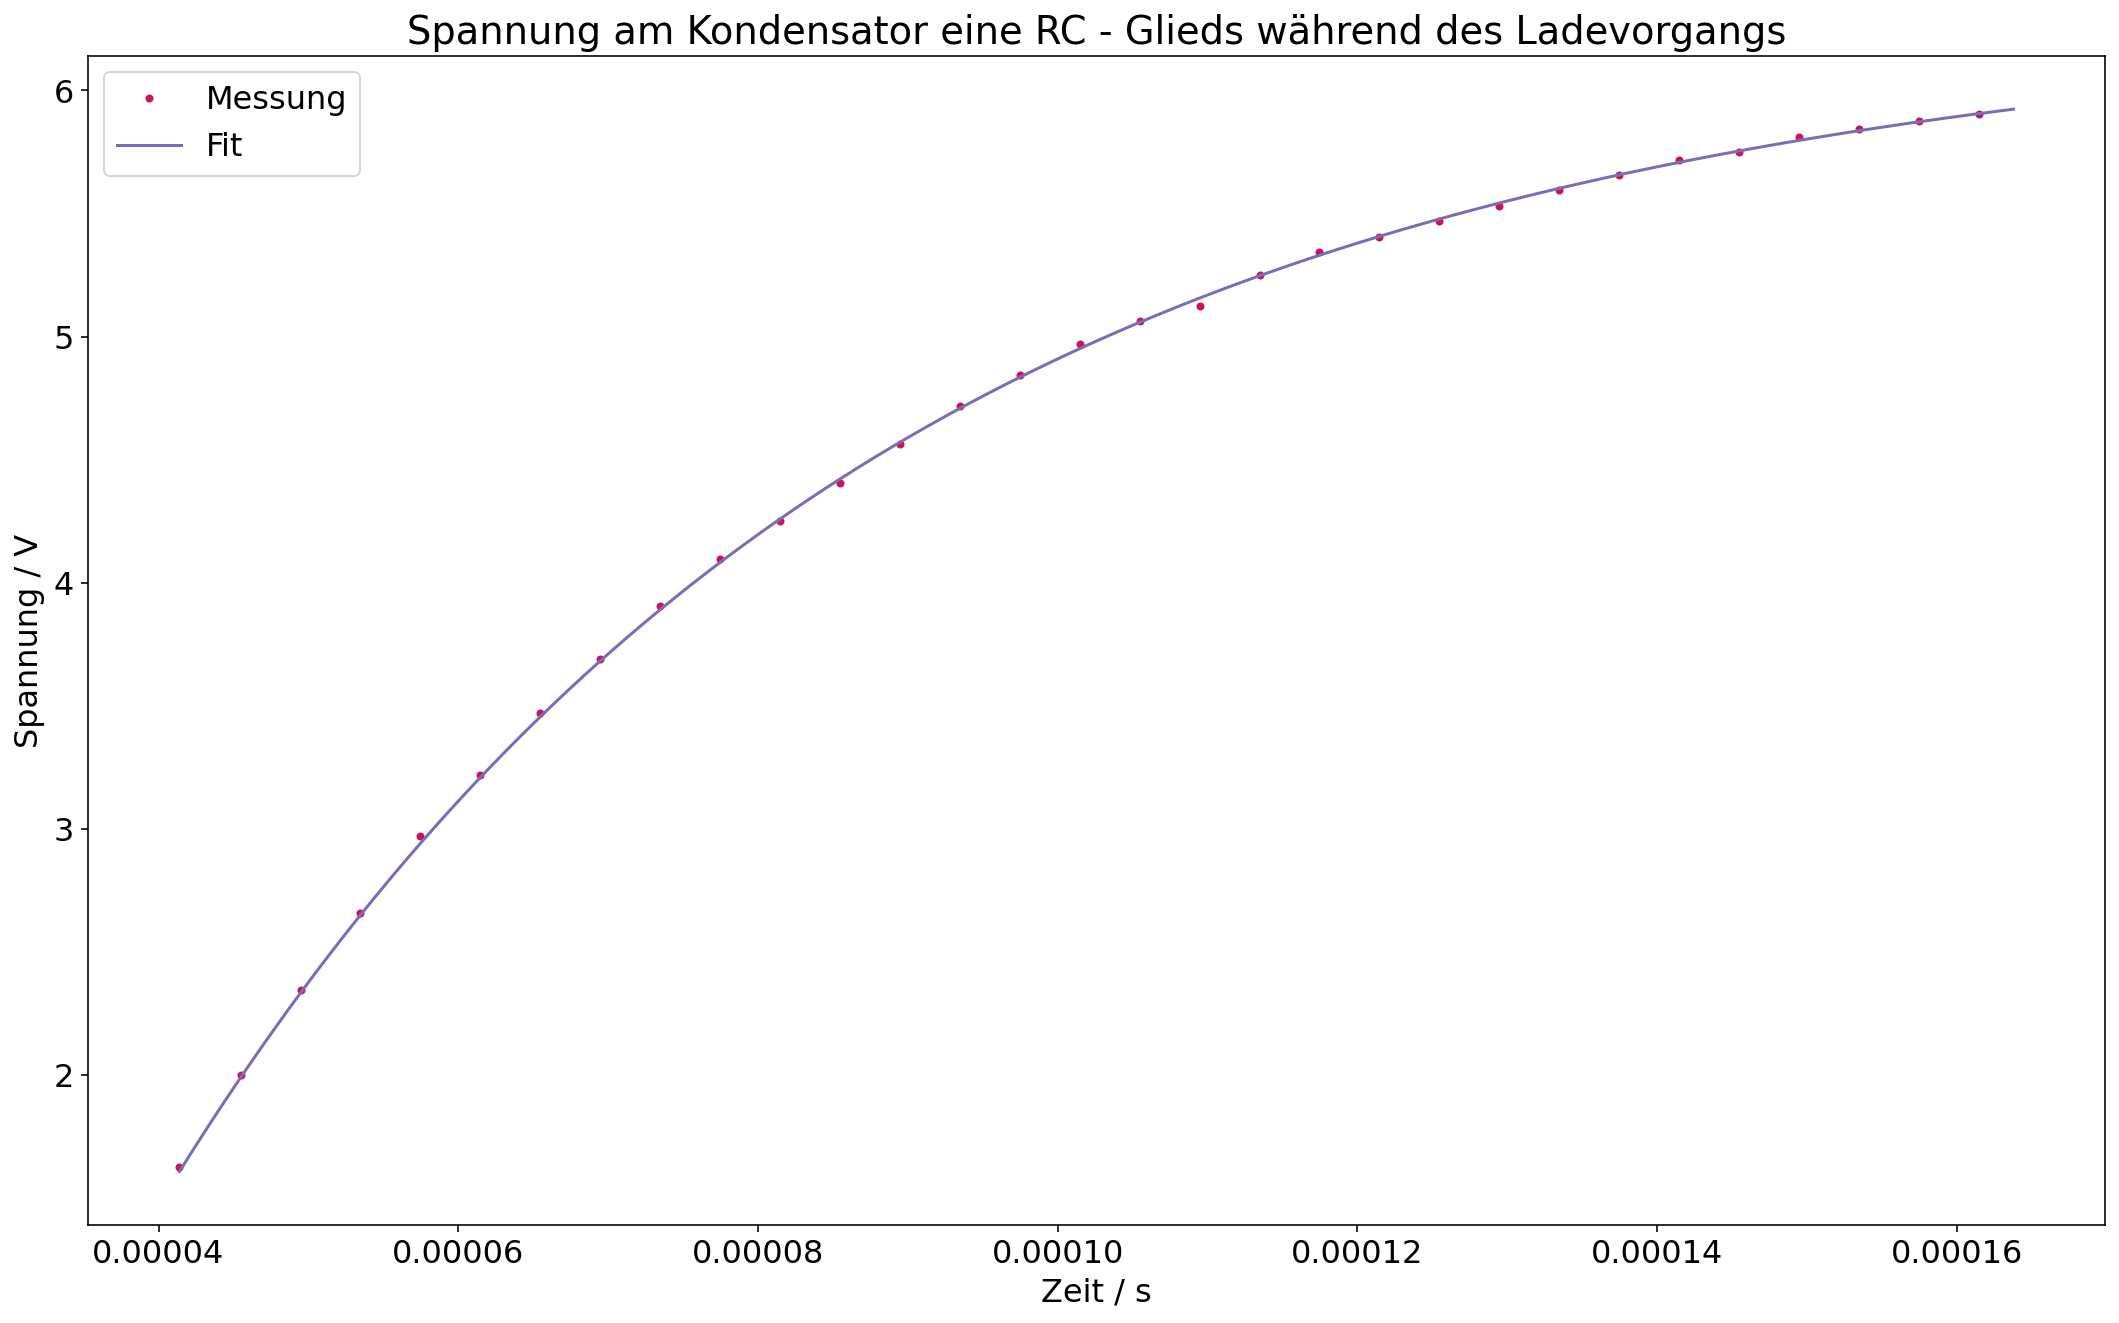

In [22]:
plt.plot(t1[::100], U_out1[::100], linestyle='None', marker='.', label='Messung')
plt.plot(t1, fit_function_1(t1, *popt_1), label='Fit')
plt.xlabel('Zeit / s')
plt.ylabel('Spannung / V')
plt.legend()
plt.title("Spannung am Kondensator eine RC - Glieds während des Ladevorgangs")
plt.show()

### Vergleich von $\tau_{exp}$ und $\tau_{theo}$ 

In [23]:
C = 4.7e-9 # F; Kapazität
R = 1e4 # Ohm; ohm. Widerstand
tau_theo = R*C
tau_theo_err = tau_theo * np.sqrt(0.05**2 + 0.1**2)
print(f'Zeitkonstante theoretisch: tau_theoretisch = {tau_theo:e} +/- {tau_theo_err}s')
print(f'Zeitkonstante aus Messung: tau_messung = {popt_1[1]:e} +/- {pcov_1[1][1]:e}s')

Zeitkonstante theoretisch: tau_theoretisch = 4.700000e-05 +/- 5.254759747124506e-06s
Zeitkonstante aus Messung: tau_messung = 4.796978e-05 +/- 1.128187e-15s


### (iii) $ C = 47$ nF, $R = 1$ k$\Omega$

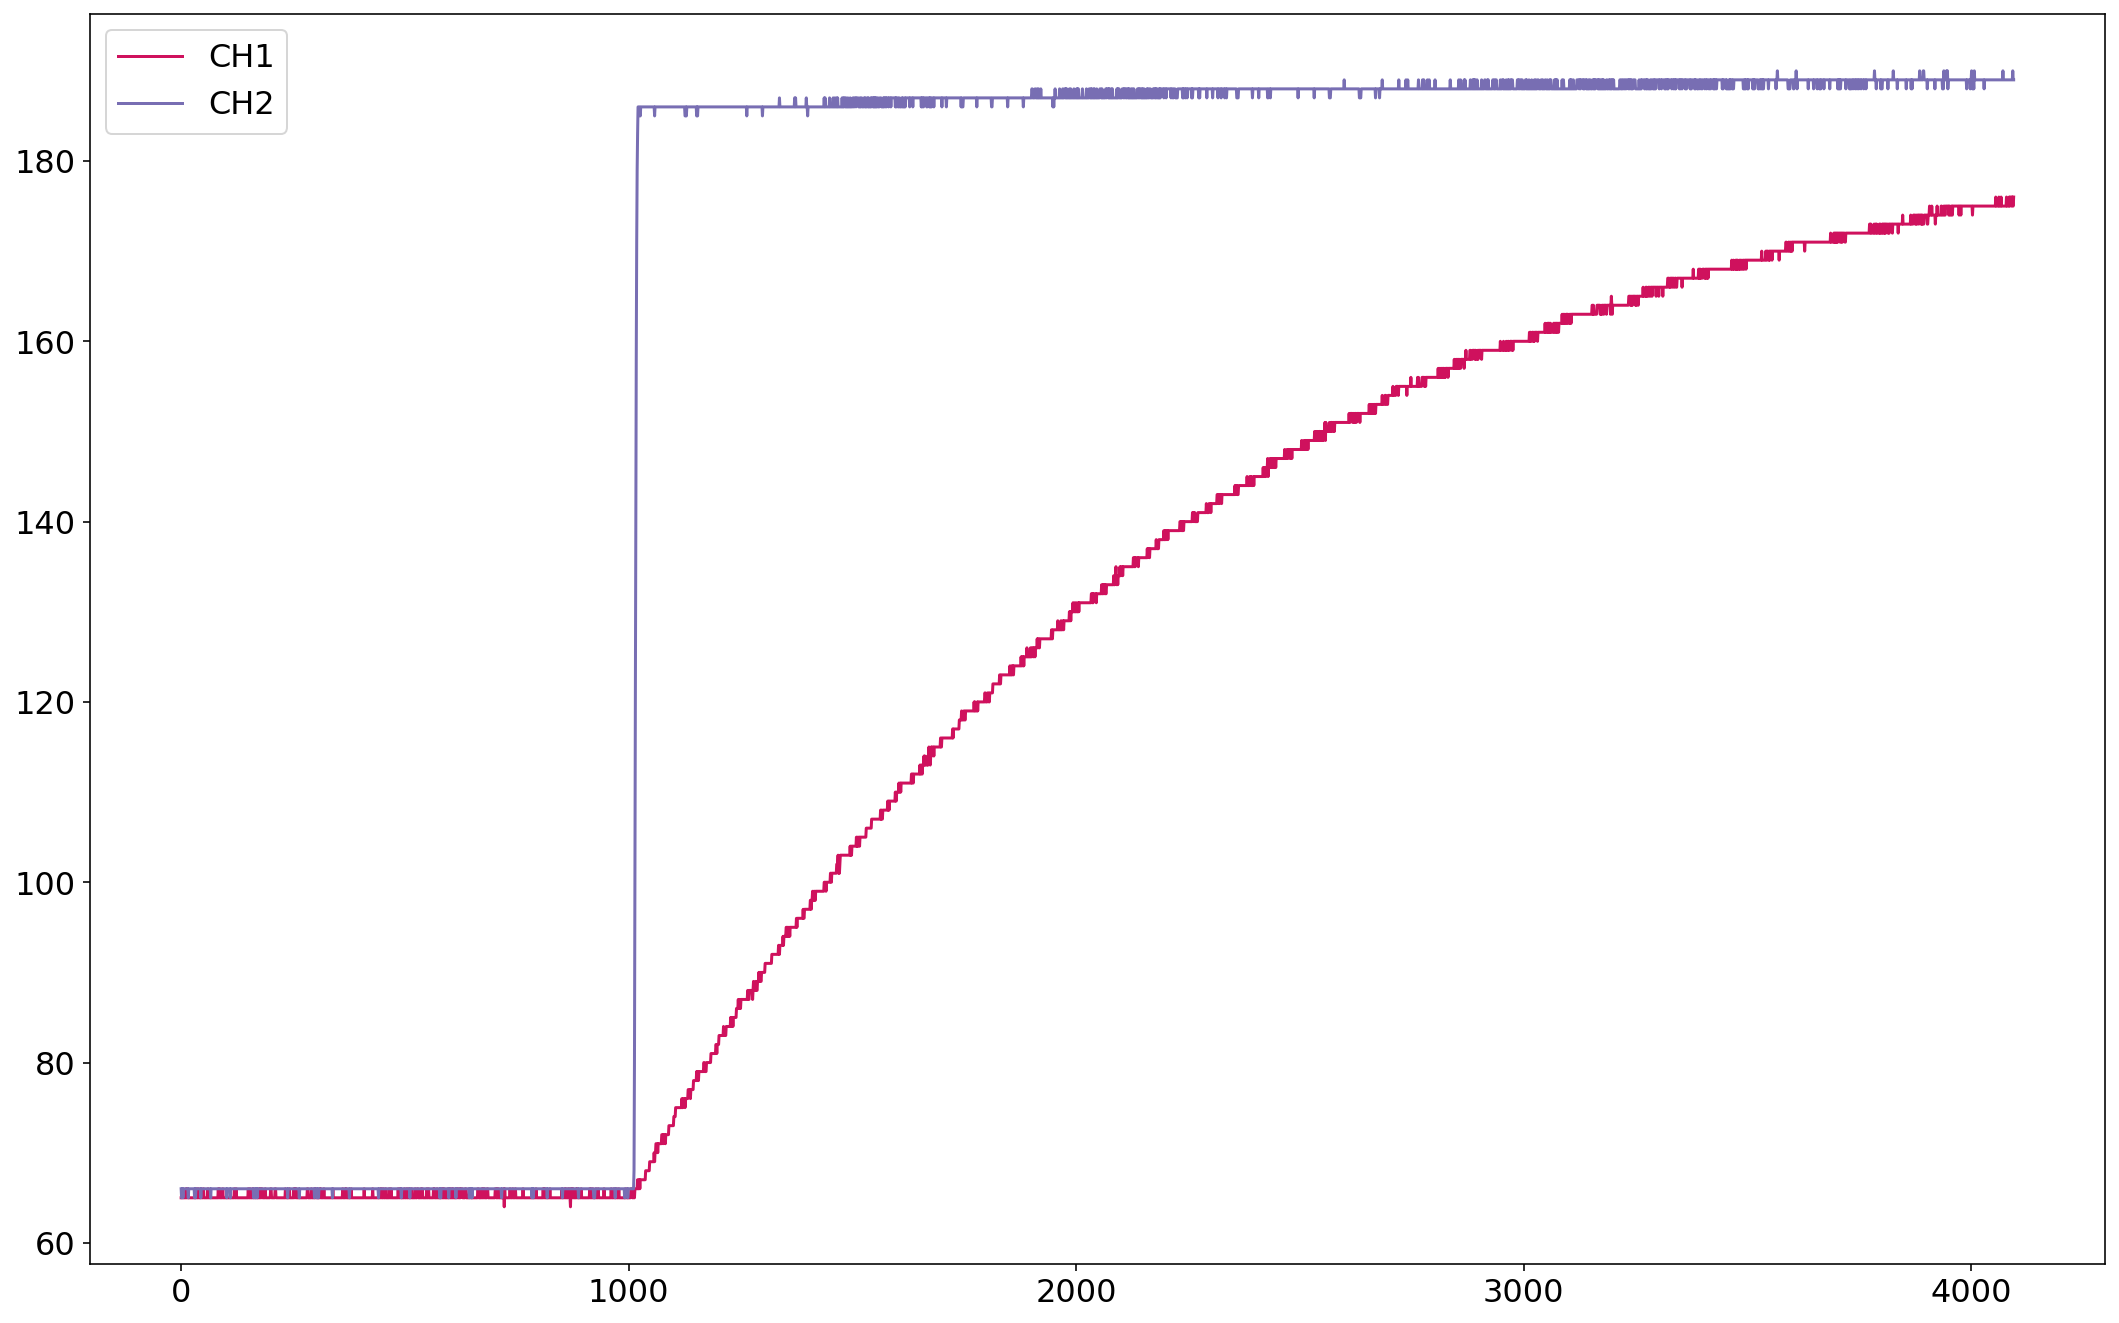

In [24]:
# Einlesen von Daten, CH1 => out, CH2 => in
N, CH1, CH2 = np.loadtxt('data/Messung1_RC3.txt', skiprows=10, unpack=True)
plt.plot(N, CH1, label='CH1')
plt.plot(N, CH2, label='CH2')
plt.legend()
plt.show()

In [25]:
# Skalierung der Werte auf Sekunden und Volt
r_N = 5e-6 / 125 # s / b.E ; ratio_N
r_ch1 = 1 / 32    # V / b.E ; ratio ch1
r_ch2 = 1 / 32    # V / b.E ; ratio ch2

t0     = r_N   * N   # s;
U_out0 = r_ch1 * CH1 # V;
U_in0  = r_ch2 * CH2 # V;

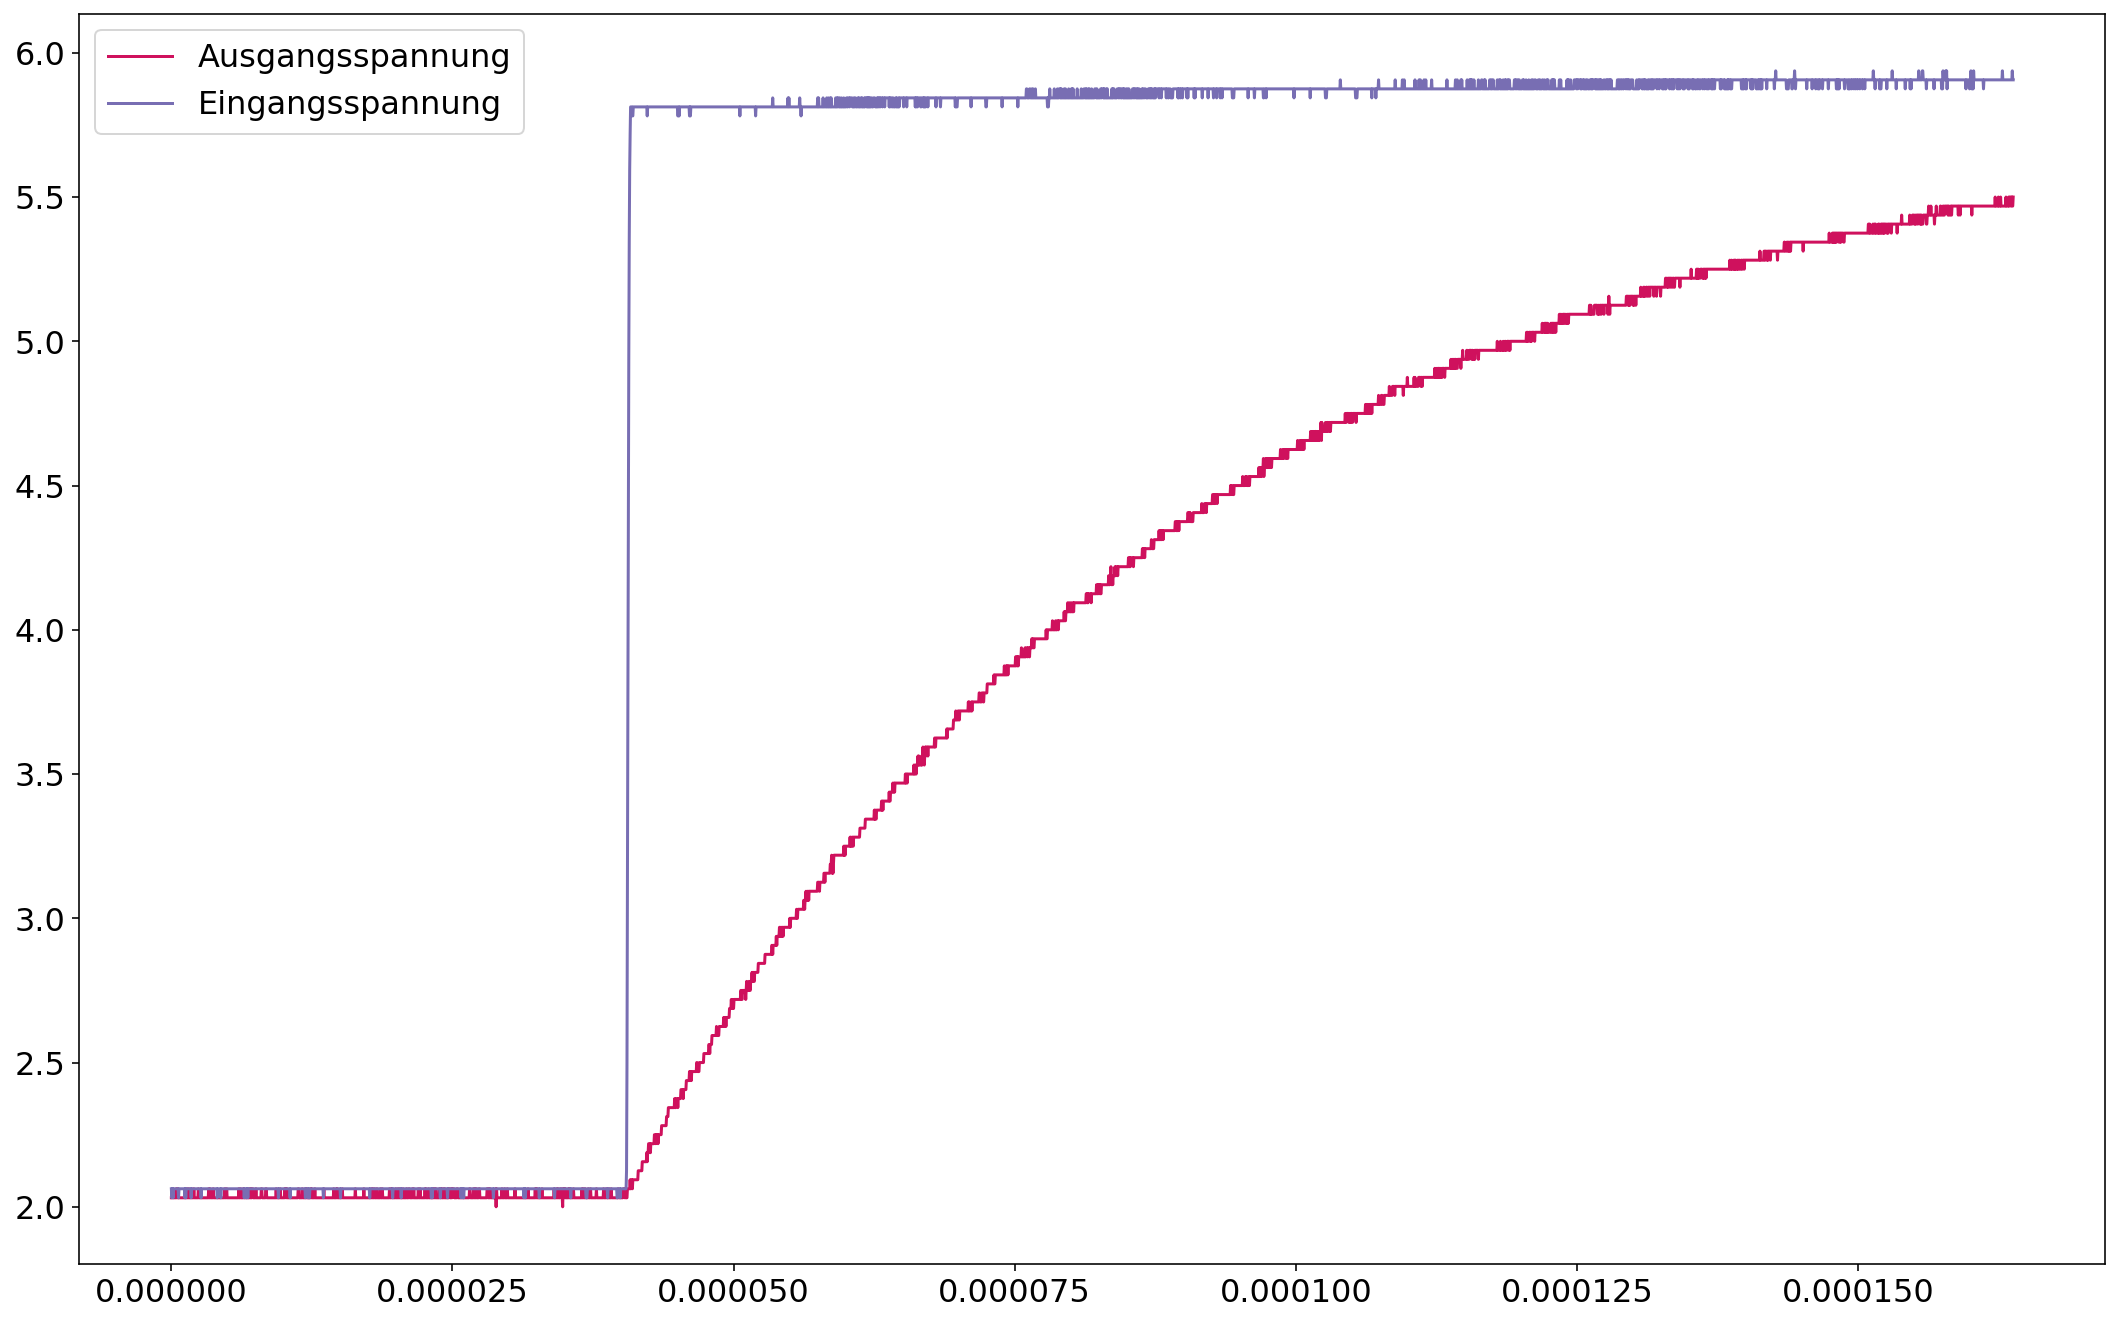

In [26]:
# Plotten der Reskalierten Größe 
plt.plot(t0, U_out0, label='Ausgangsspannung')
plt.plot(t0, U_in0,  label='Eingangsspannung')
plt.legend()
plt.show()

In [27]:
# Inspeziere kleine Werte
print(U_out0[:1500:100])
print(U_in0[:1500:100])

[2.03125 2.03125 2.0625  2.0625  2.03125 2.03125 2.03125 2.03125 2.03125
 2.03125 2.03125 2.28125 2.5625  2.8125  3.03125]
[2.0625  2.0625  2.0625  2.0625  2.0625  2.0625  2.0625  2.0625  2.0625
 2.0625  2.0625  5.8125  5.8125  5.8125  5.78125]


In [28]:
# Entferne alle Werte mit U <= 1.5 V
index = (U_out0 > 2.1)

U_out1 = U_out0[index]
U_in1  = U_in0[index]
t1     = t0[index]

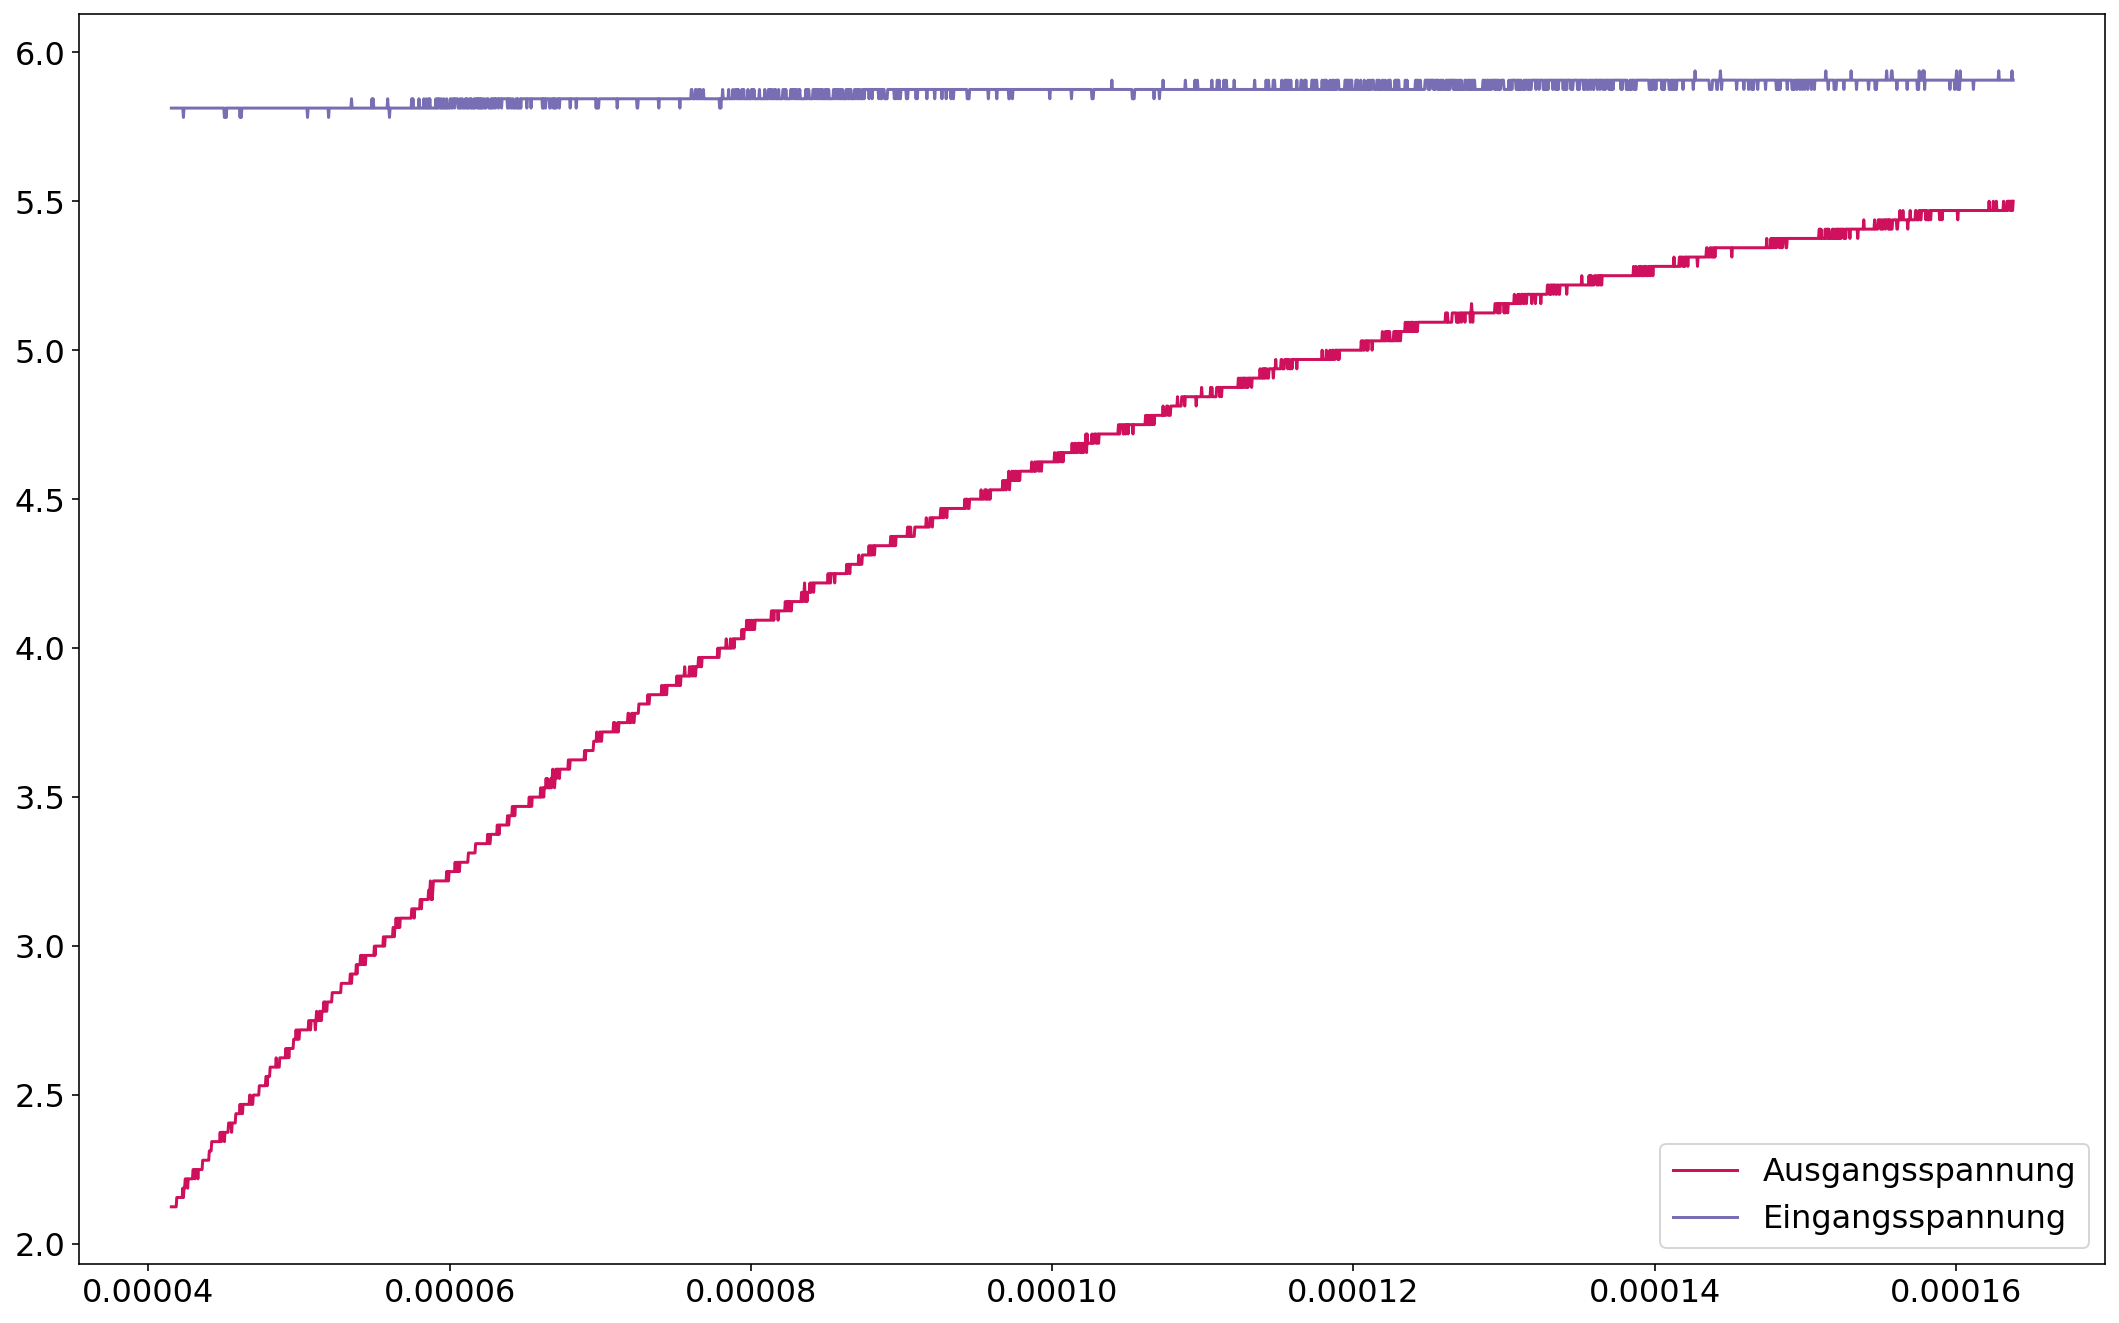

In [29]:
# Plotte Ausschnitt der Spannung über Kondensator
plt.plot(t1, U_out1, label='Ausgangsspannung')
plt.plot(t1, U_in1,  label='Eingangsspannung')
plt.legend()
plt.show()

### Fit Funktion
$$f(t) = U_E (1 - e^{-t/\tau}) + c $$

In [30]:
def fit_function_1(t, U_E, tau, offset):
    return U_E * (1 - np.exp(-t/tau)) + offset 

popt_1, pcov_1 = curve_fit(fit_function_1, t1, U_out1, p0=[10, 0.00005, -2])

print(popt_1)

[ 8.19250193e+00  5.23922743e-05 -2.34776380e+00]


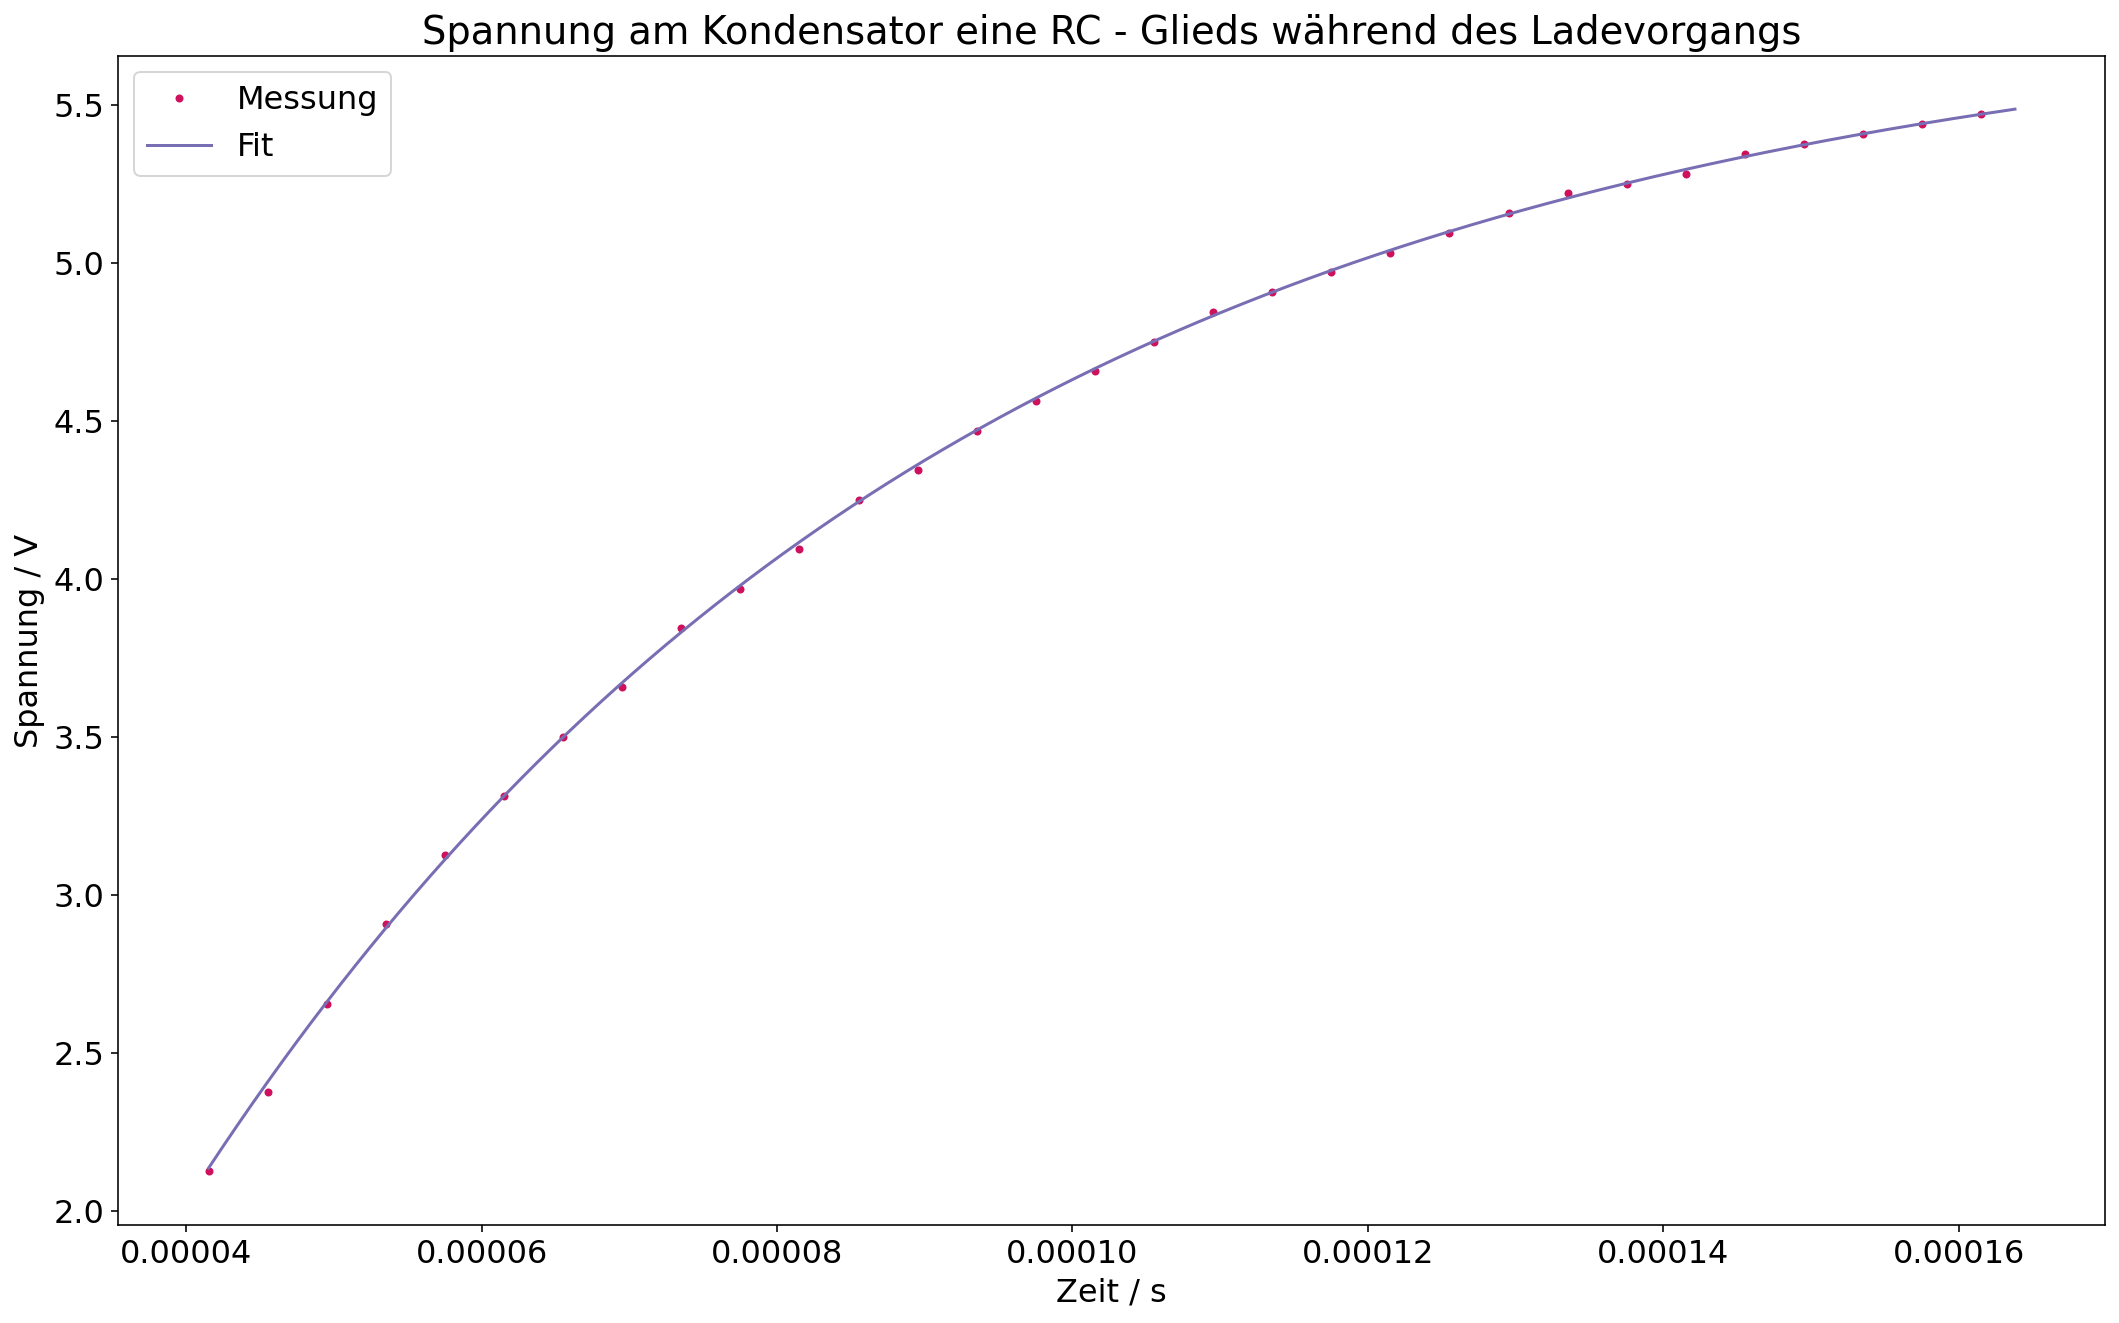

In [31]:
plt.plot(t1[::100], U_out1[::100], linestyle='None', marker='.', label='Messung')
plt.plot(t1, fit_function_1(t1, *popt_1), label='Fit')
plt.xlabel('Zeit / s')
plt.ylabel('Spannung / V')
plt.legend()
plt.title("Spannung am Kondensator eine RC - Glieds während des Ladevorgangs")
plt.show()

### Vergleich von $\tau_{exp}$ und $\tau_{theo}$ 

In [32]:
C = 47e-9 # F; Kapazität
R = 1e3 # Ohm; ohm. Widerstand
tau_theo = R*C
tau_theo_err = tau_theo * np.sqrt(0.05**2 + 0.1**2)
print(f'Zeitkonstante theoretisch: tau_theoretisch = {tau_theo:e} +/- {tau_theo_err}s')
print(f'Zeitkonstante aus Messung: tau_messung = {popt_1[1]:e} +/- {pcov_1[1][1]:e}s')

Zeitkonstante theoretisch: tau_theoretisch = 4.700000e-05 +/- 5.254759747124506e-06s
Zeitkonstante aus Messung: tau_messung = 5.239227e-05 +/- 2.612897e-15s


### Spannung über Widerstand
### (iii) $ C = 47$ nF, $R = 1$ k$\Omega$

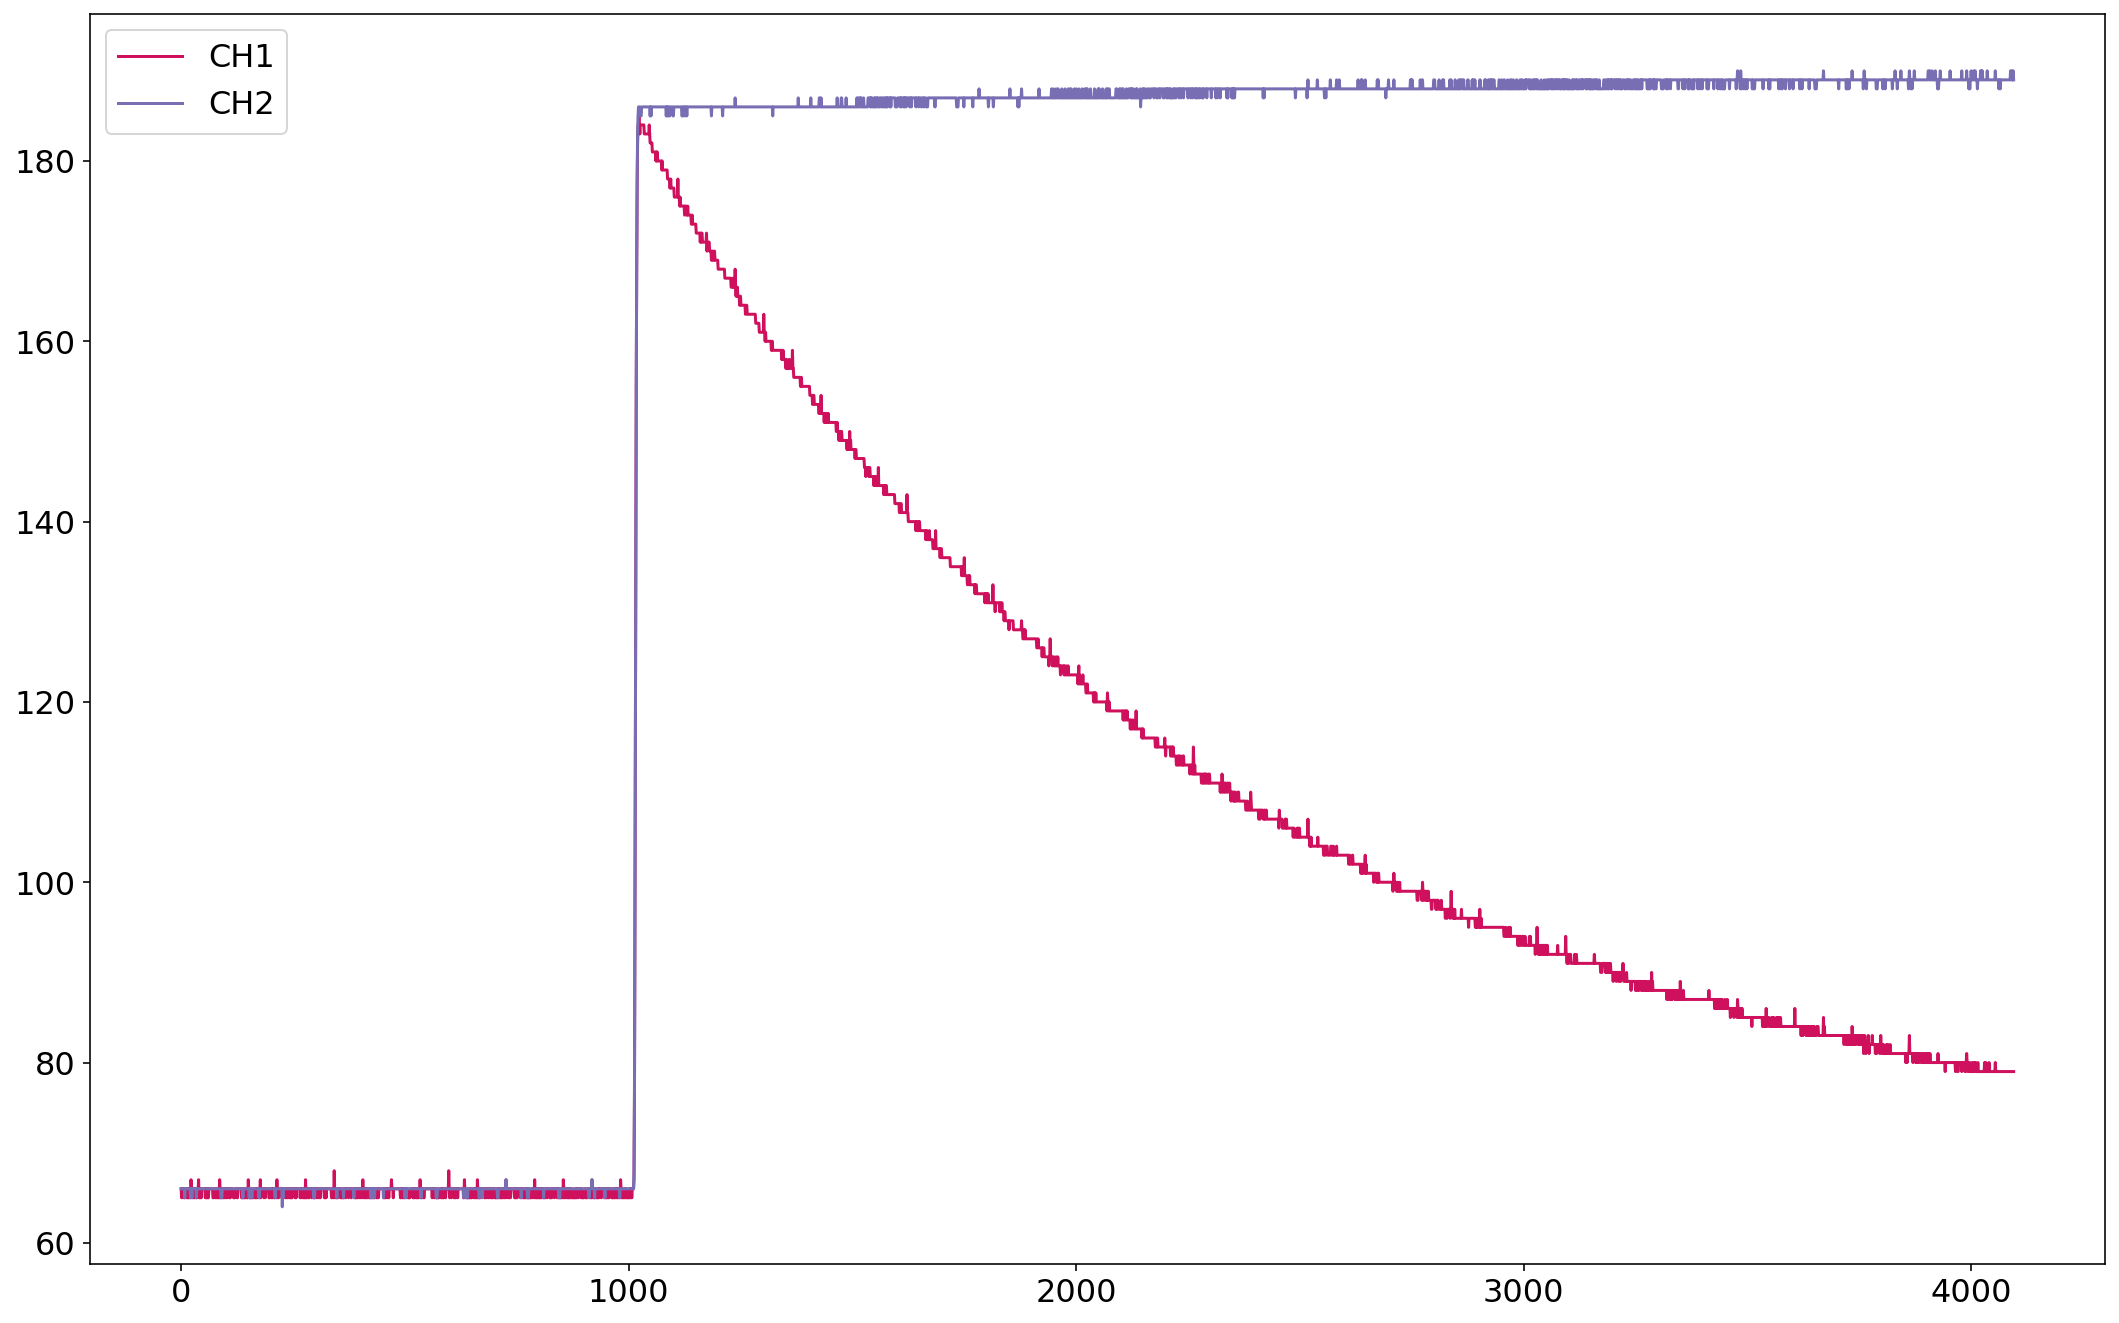

In [33]:
# Einlesen von Daten, CH1 => out, CH2 => in
N, CH1, CH2 = np.loadtxt('data/Messung1_CR.txt', skiprows=10, unpack=True)
plt.plot(N, CH1, label='CH1')
plt.plot(N, CH2, label='CH2')
plt.legend()
plt.show()

In [34]:
# Skalierung der Werte auf Sekunden und Volt
r_N = 5e-6 / 125 # s / b.E ; ratio_N
r_ch1 = 1 / 32    # V / b.E ; ratio ch1
r_ch2 = 1 / 32    # V / b.E ; ratio ch2

t0     = r_N   * N   # s;
U_out0 = r_ch1 * CH1 # V;
U_in0  = r_ch2 * CH2 # V;

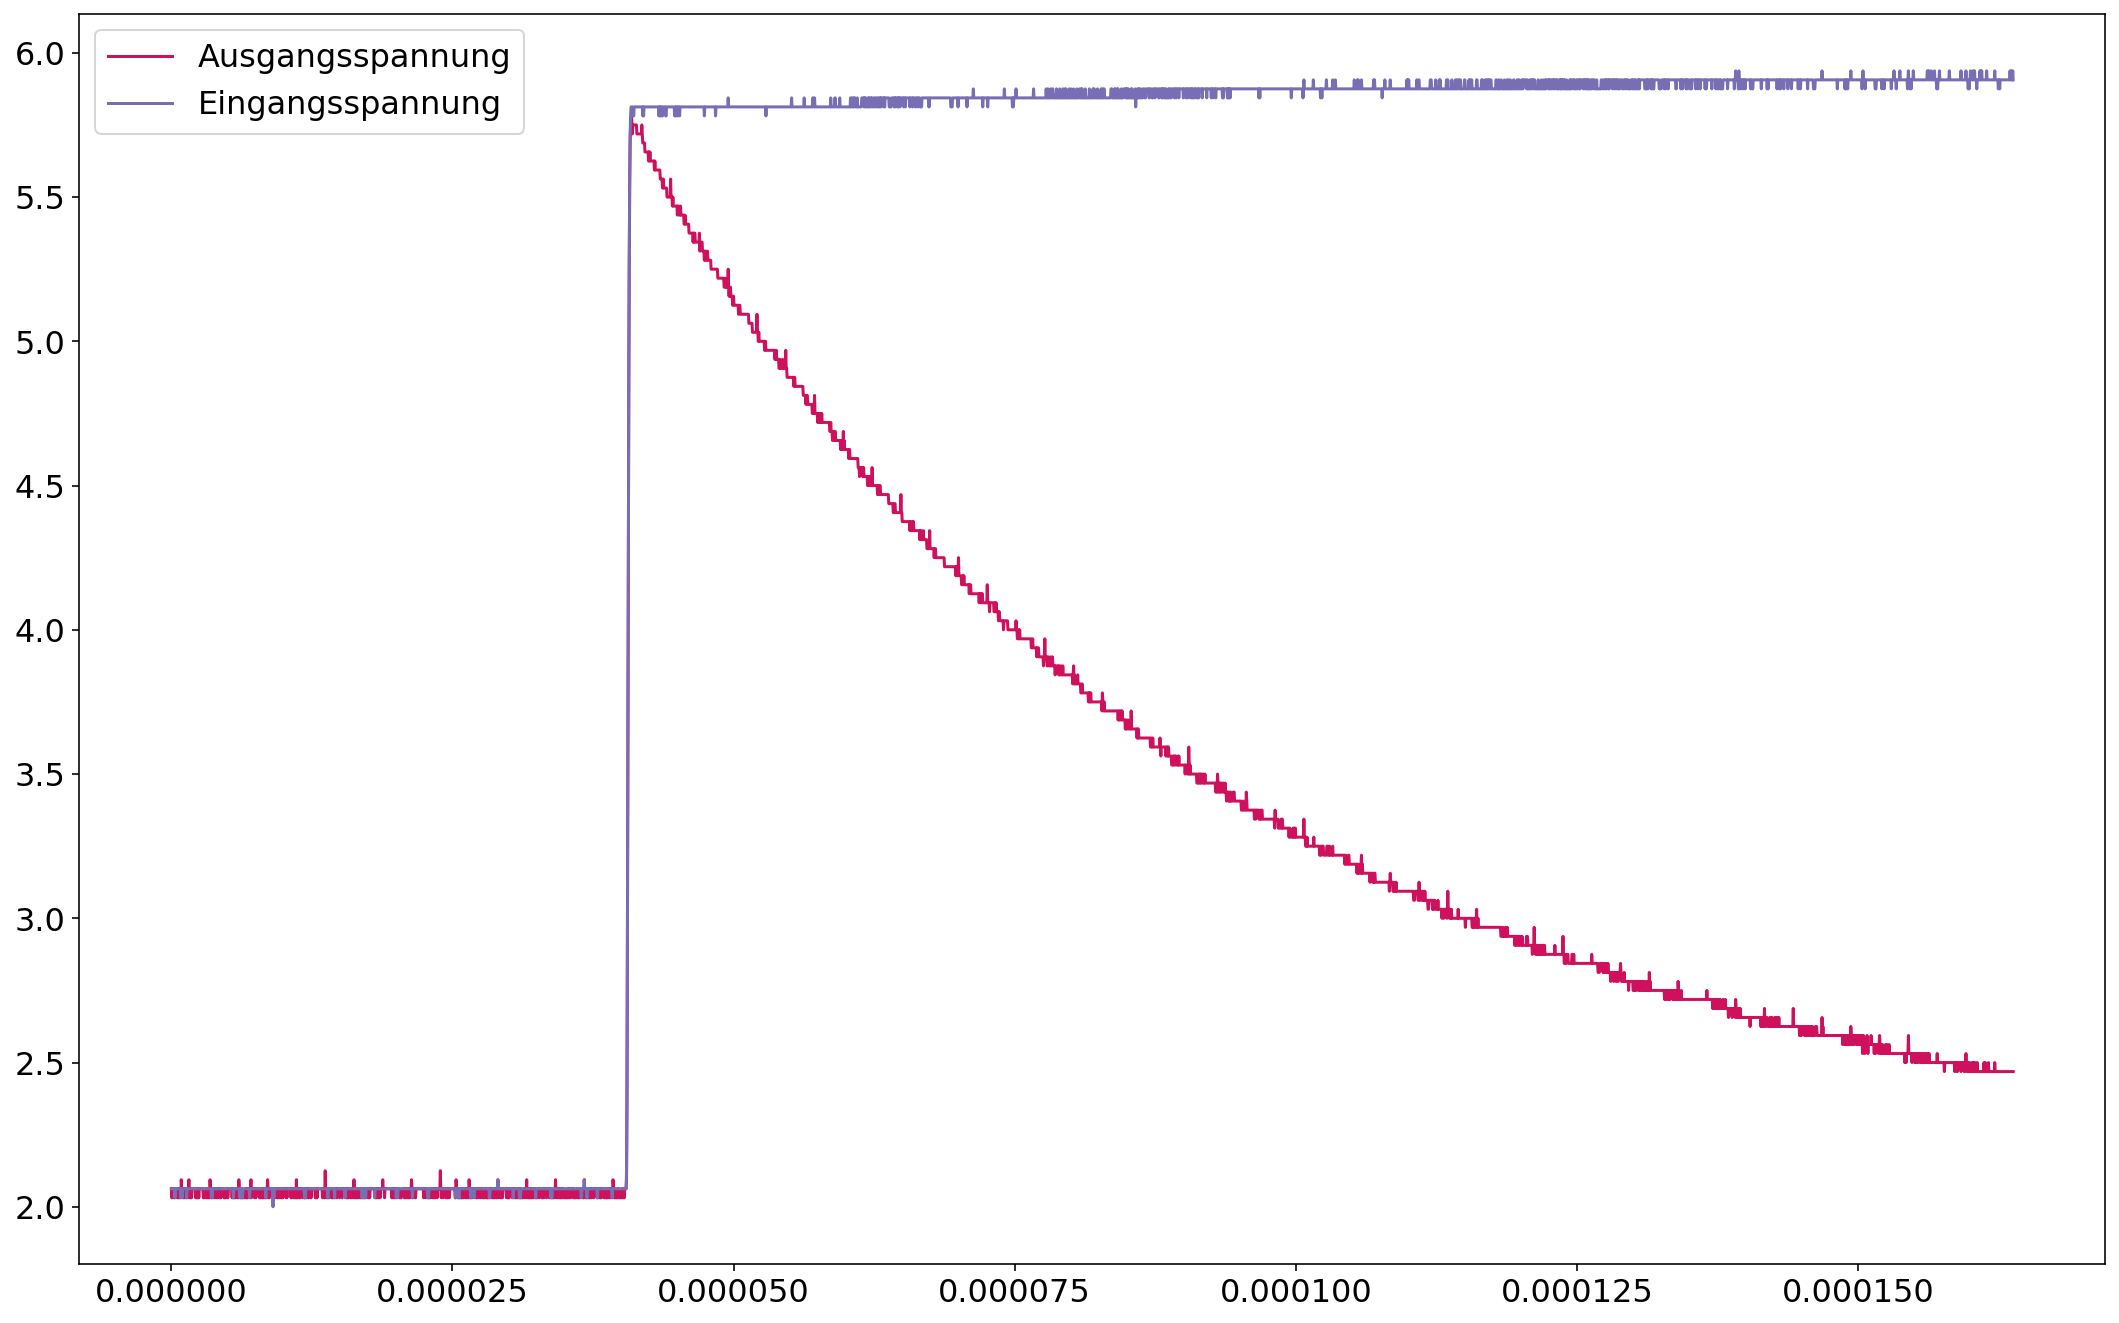

In [35]:
# Plotten der Reskalierten Größe 
plt.plot(t0, U_out0, label='Ausgangsspannung')
plt.plot(t0, U_in0,  label='Eingangsspannung')
plt.legend()
plt.show()

In [36]:
# Inspeziere kleine Werte
print(U_out0[:1500:100])
print(U_in0[:1500:100])

[2.0625  2.03125 2.0625  2.0625  2.03125 2.03125 2.03125 2.03125 2.03125
 2.03125 2.03125 5.53125 5.25    5.03125 4.84375]
[2.0625  2.0625  2.0625  2.0625  2.0625  2.03125 2.0625  2.0625  2.0625
 2.0625  2.0625  5.78125 5.8125  5.8125  5.8125 ]


In [37]:
# Entferne aller Werte für die der Kondensator nicht auflädt 

U_out1 = U_out0[1100:]
U_in1  = U_in0[1100:]
t1     = t0[1100:]

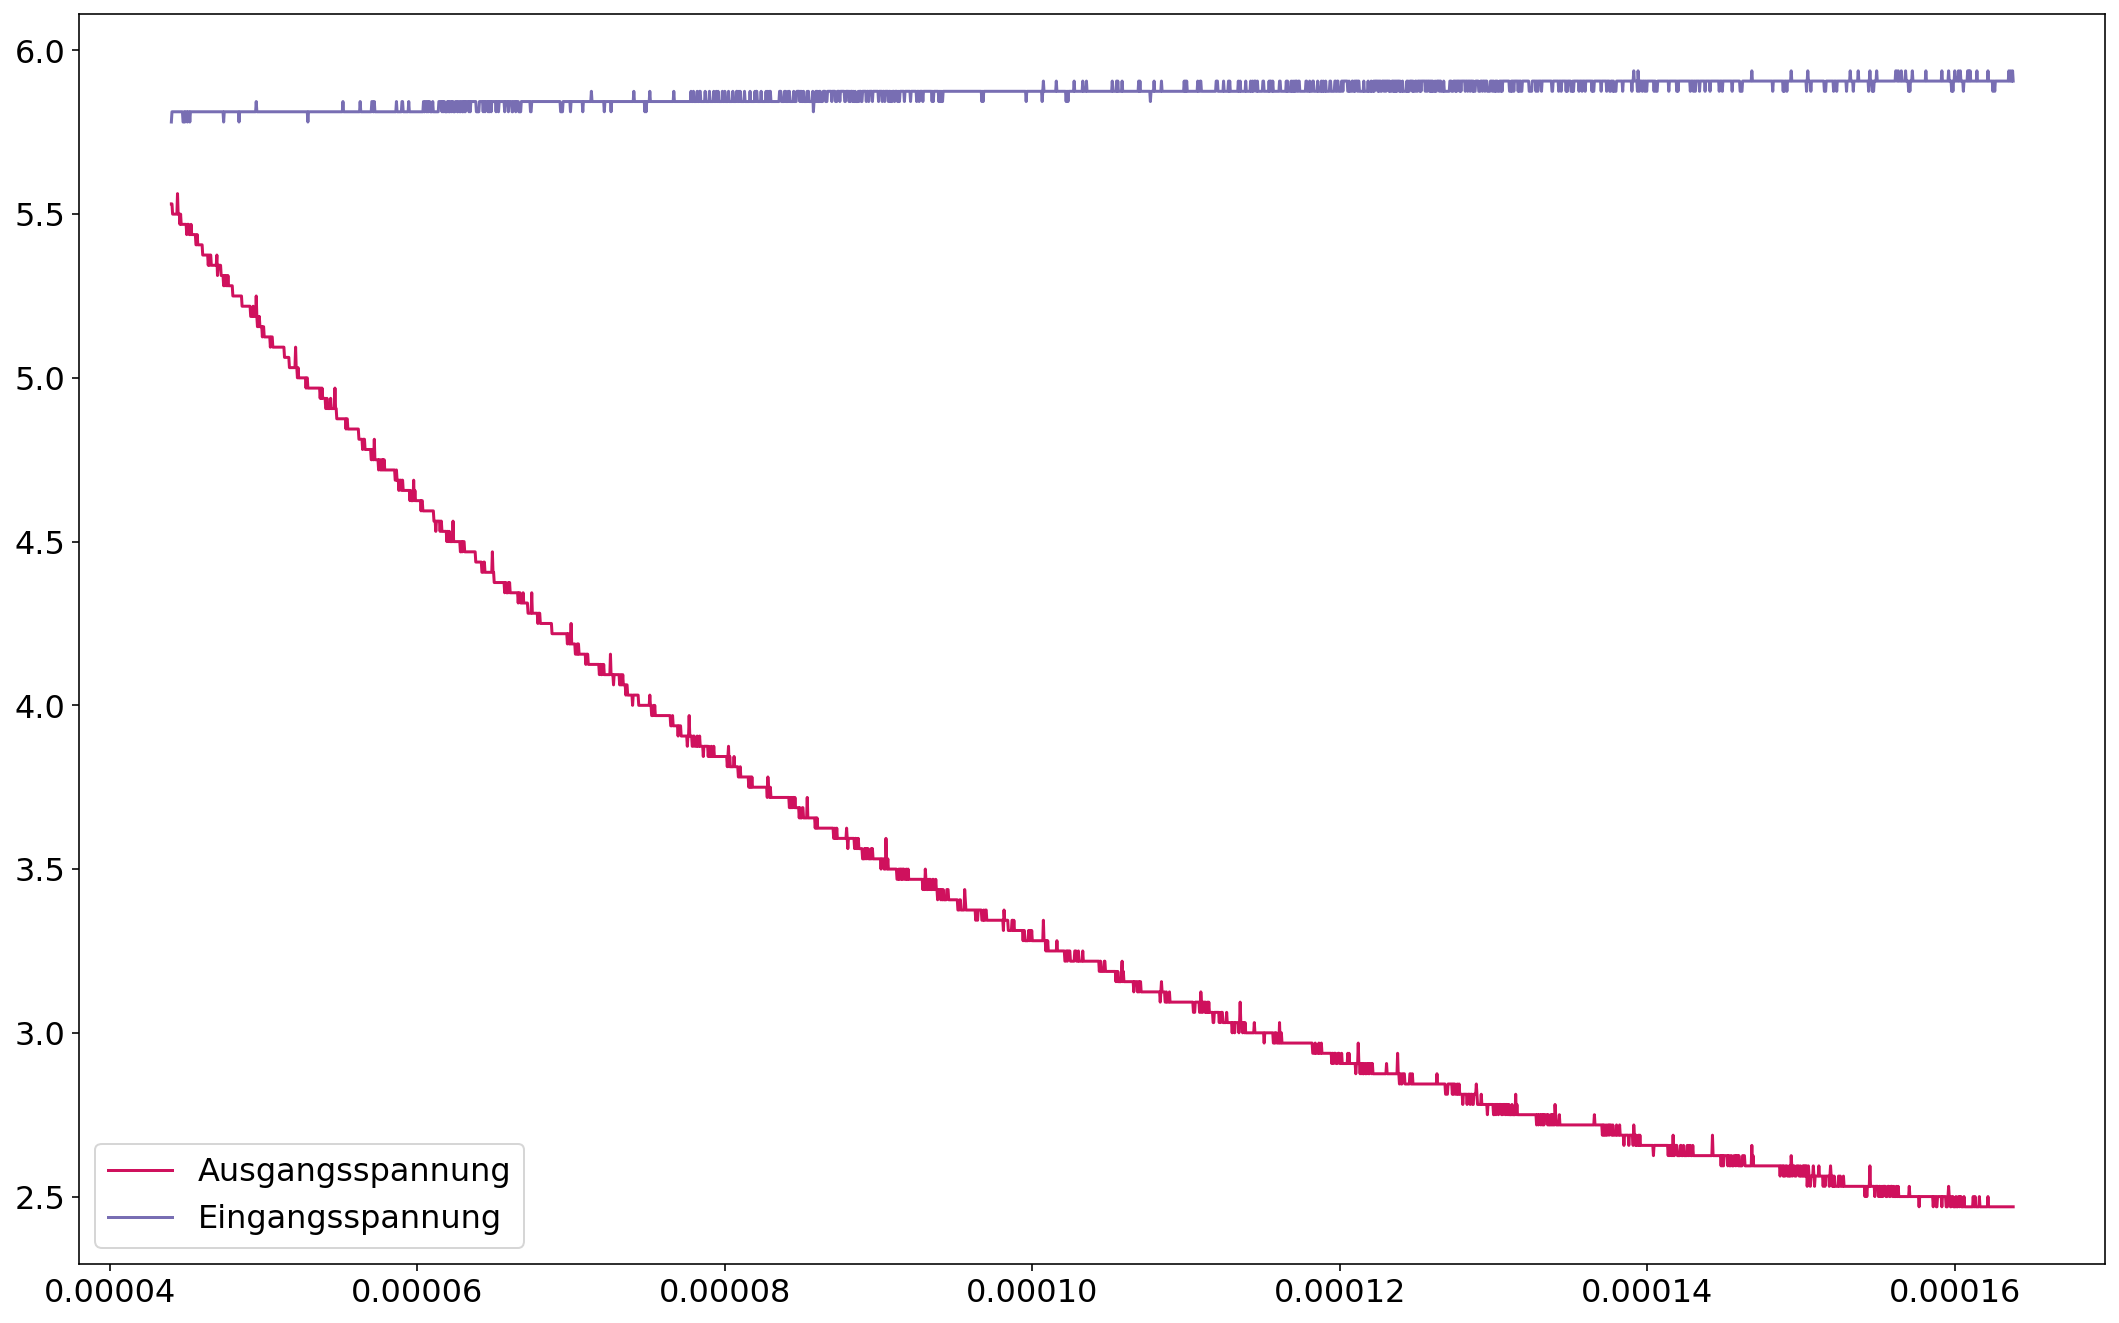

In [38]:
# Plotte Ausschnitt der Spannung über Kondensator
plt.plot(t1, U_out1, label='Ausgangsspannung')
plt.plot(t1, U_in1,  label='Eingangsspannung')
plt.legend()
plt.show()

### Fit Funktion
$$f(t) = U_E e^{-t/\tau} + c $$

In [39]:
def fit_function_1(t, U_E, tau, offset):
    return U_E * np.exp(-t/tau) + offset 

popt_1, pcov_1 = curve_fit(fit_function_1, t1, U_out1, p0=[10, 0.00005, -2])

print(popt_1)

[7.85634756e+00 5.25141946e-05 2.11832553e+00]


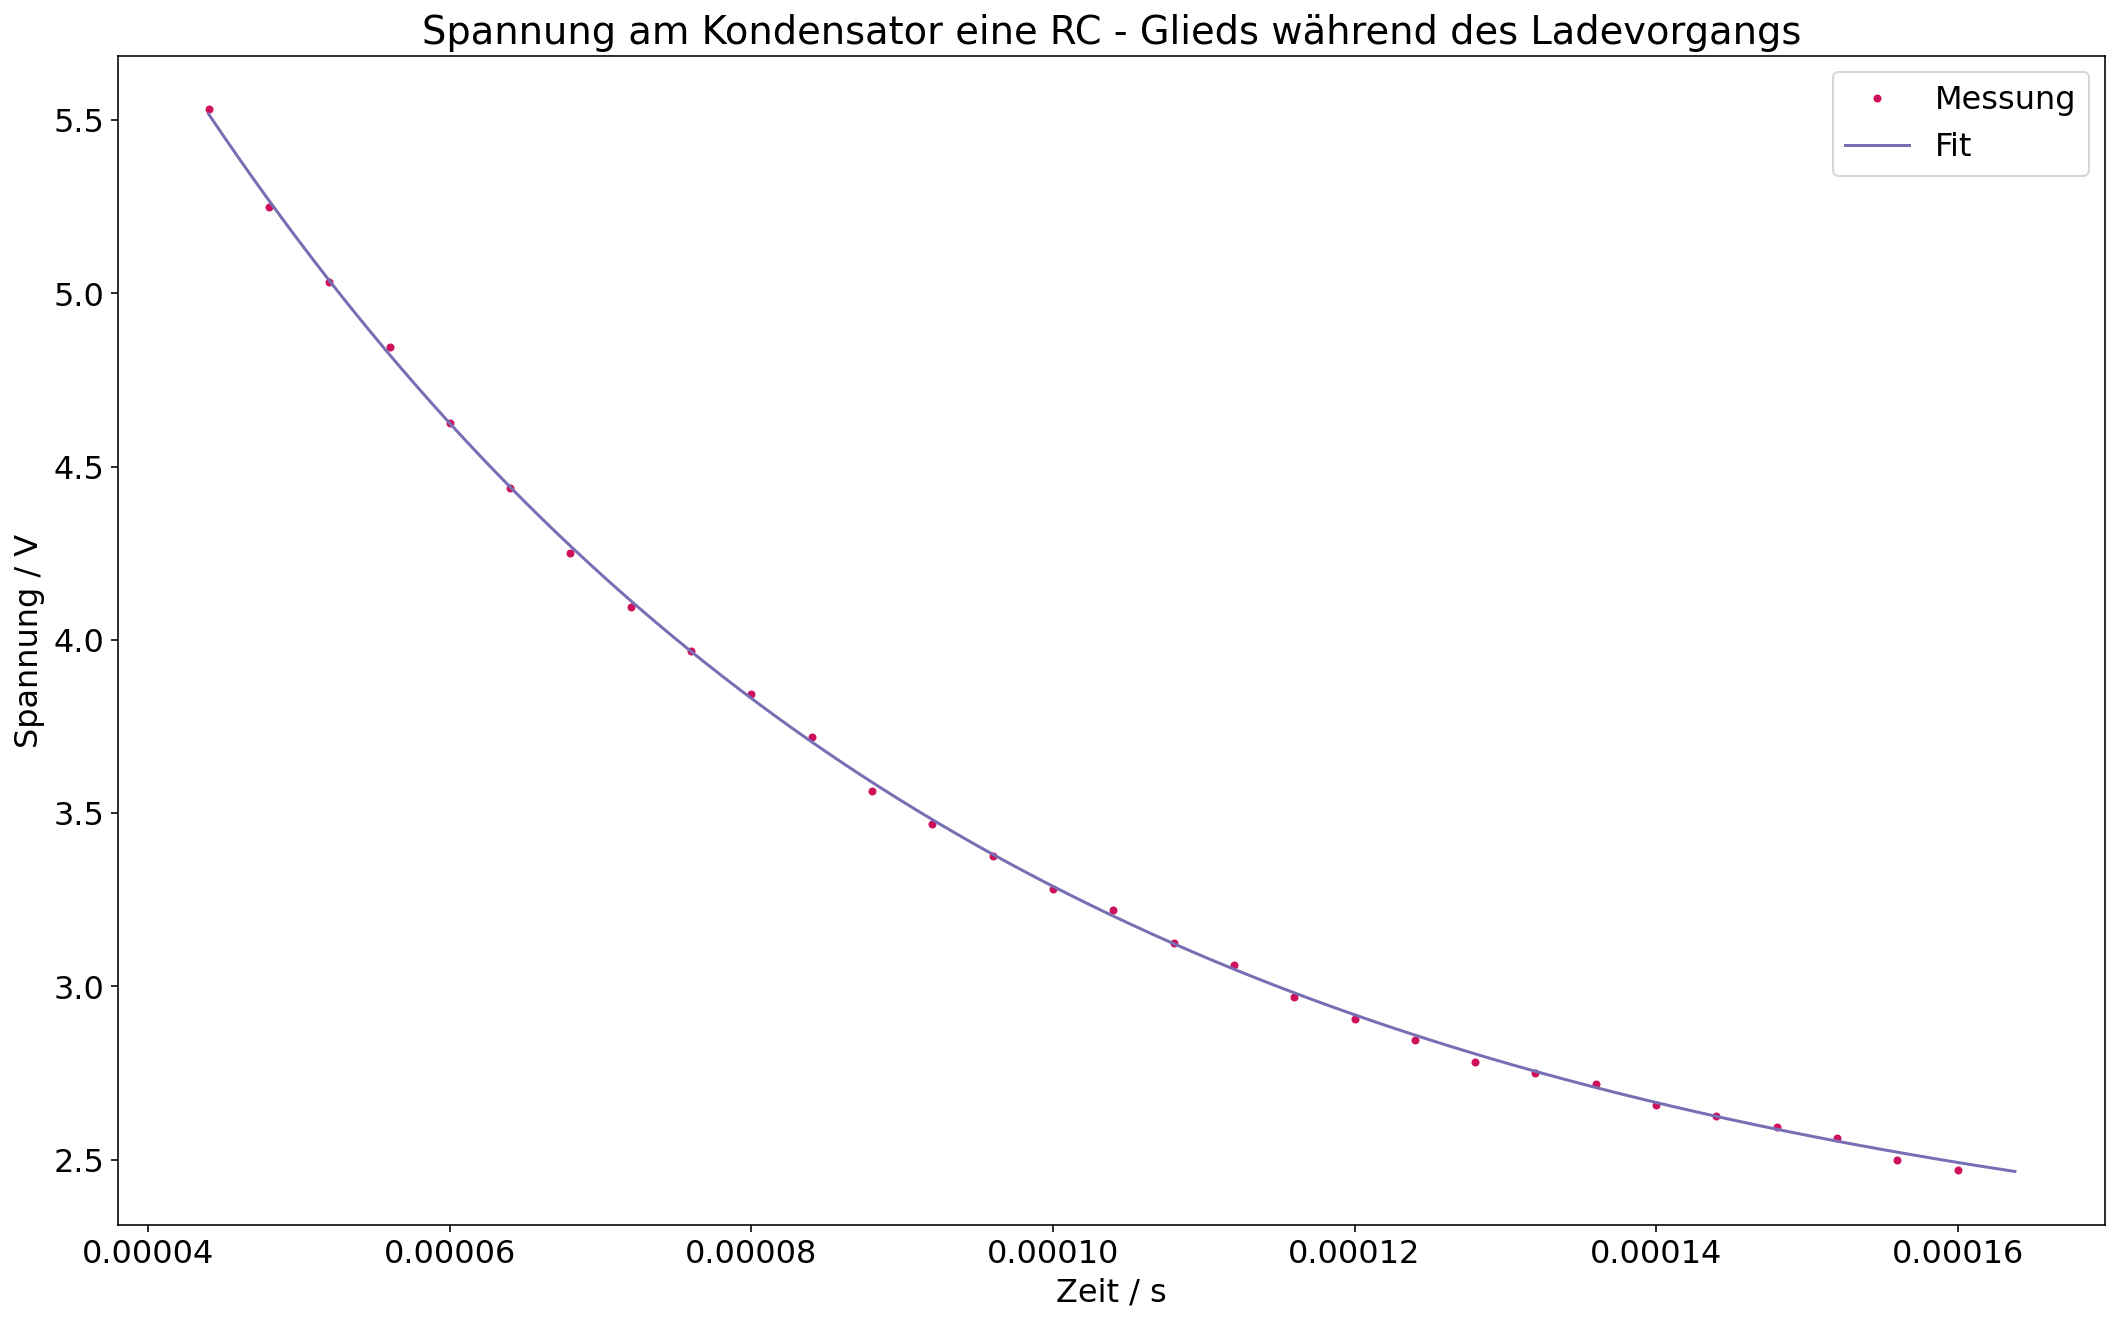

In [40]:
plt.plot(t1[::100], U_out1[::100], linestyle='None', marker='.', label='Messung')
plt.plot(t1, fit_function_1(t1, *popt_1), label='Fit')
plt.xlabel('Zeit / s')
plt.ylabel('Spannung / V')
plt.legend()
plt.title("Spannung am Kondensator eine RC - Glieds während des Ladevorgangs")
plt.show()

### Vergleich von $\tau_{exp}$ und $\tau_{theo}$ 

In [41]:
C = 47e-9 # F; Kapazität
R = 1e3 # Ohm; ohm. Widerstand
tau_theo = R*C
tau_theo_err = tau_theo * np.sqrt(0.05**2 + 0.1**2)
print(f'Zeitkonstante theoretisch: tau_theoretisch = {tau_theo:e} +/- {tau_theo_err}s')
print(f'Zeitkonstante aus Messung: tau_messung = {popt_1[1]:e} +/- {pcov_1[1][1]:e}s')

Zeitkonstante theoretisch: tau_theoretisch = 4.700000e-05 +/- 5.254759747124506e-06s
Zeitkonstante aus Messung: tau_messung = 5.251419e-05 +/- 3.886605e-15s
